# <b> Project Title : EDSA - Climate Change Belief Analysis 2021 </u></b>

###  Objective: Predict an individual’s belief in climate change based on historical tweet data

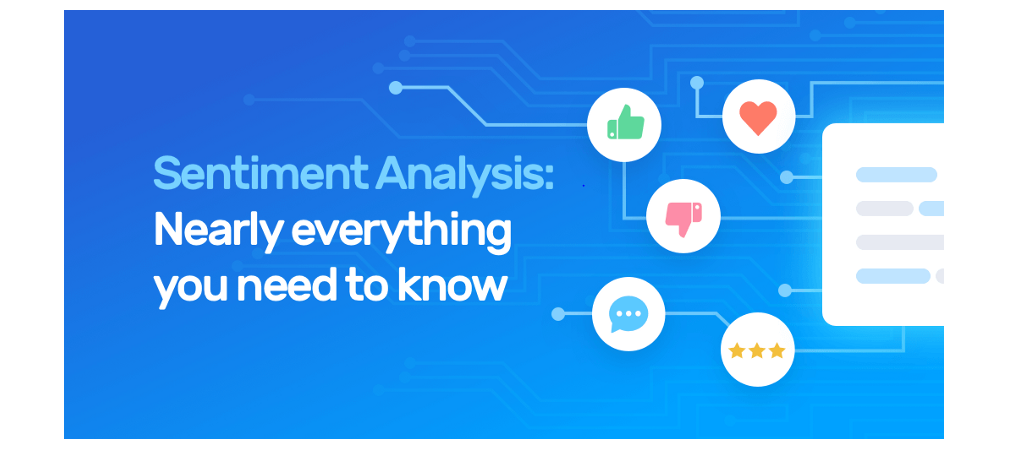

# <u><b> Authors :- 
## Iddo Smith 👨‍💻 💻 
## Katleho Moketo 👨‍💻 💻 
## Maxwell Munzhedzi 👨‍💻 💻 
## Precious Chauke 👩‍💻 💻 
## Richard Malahlela 👨‍💻 💻 

# <u> **Data Description**

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

**Class Description:**

* **2 News:** the tweet links to factual news about climate change 
* **1 Pro:** the tweet supports the belief of man-made climate change 
* **0 Neutral:** the tweet neither supports nor refutes the belief of man-made climate change 
* **-1 Anti:** the tweet does not believe in man-made climate change 

**Variable definitions:**
**Columns:**

* **sentiment:** Sentiment of tweet 
* **message:** Tweet body 
* **tweetid:** Twitter unique id 

**Files available for download:**
* **train.csv** - You will use this data to train your model. 
* **test.csv** - You will use this data to test your model. 
* **SampleSubmission.csv** - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

 #                                ------- @TEAM CLASSIFICATION AM5 DSFT21 --------

# WORKFLOW

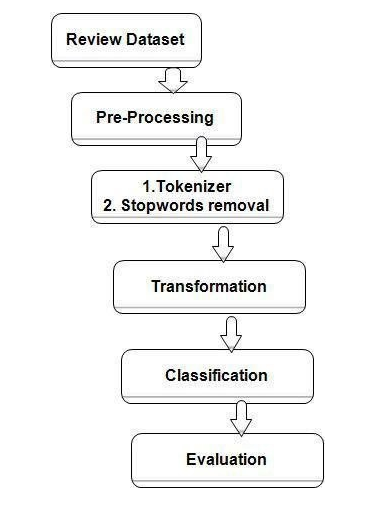

# <u><b>IMPORTS

In [1]:
import pandas as pd
import numpy as np
import spacy
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
special = string.punctuation 
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

#Importing other libraries
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim
from fastai.text.all import *
from collections import defaultdict
from collections import  Counter
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
additional  = ['retweet']
stop = set().union(stopwords.words('english'),additional)
import nltk
nltk.download('wordnet')

# Downloads
#nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Richie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       dat

# LOAD DATA 

In [2]:
train_df = pd.read_csv('train.csv')#Load train data set
test_df = pd.read_csv('test.csv')#Load test data set
print(train_df.shape) #print shape of the train data set
print(test_df.shape) #print shape of the train data set

(15819, 3)
(10546, 2)


 * We have 15819 rows and 3 columns of the train data set
 * We have 10546 rows and 2 columns of the test data set

#  REVIEWING OUR DATASET

In [3]:
train_df.head() #Selecting only the first 5 rows of the train data set

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  
0   625221  
1   126103  
2   698562  
3   573736  
4   466954

In [4]:
train_df.info() #View the information about the train data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


 * **sentiment and tweetid are of int datatype and message is of object datatype**

In [5]:
# There are 4 unique sentiment types in our dataset
train_df['sentiment'].value_counts() #This code prints out the total number of each unique value in our sentiment column

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

* **1 = 8530 Second most**
* **2 = 3640 Third most**
* **0 = 2353 Forth most**
* **-1 = 1296 Most**

##  GOING DEEPER INTO TWEET & SENTIMENT.

In [6]:
train_df[train_df['sentiment']==1] # Only select The Pro-tweets.

sentiment  \
0              1   
1              1   
3              1   
4              1   
5              1   
...          ...   
15807          1   
15811          1   
15812          1   
15813          1   
15814          1   

                                                                                                                                                  message  \
0            PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                          It's not like we lack evidence of anthropogenic global warming   
3                                                     #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                              RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   
5                                          Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j   
...                                                                                                                                                   ...   
15807           #scottpruit climate change comments would be like NASA saying, 'The moon landing is complicated, a hoax or not? further study is needed.”   
15811  RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦   
15812        RT @SierraClub: 2016: hottest year in history. Also in 2016: 182 Members of Congress denied climate change is real. https://t.co/XMOvALz3c9…   
15813     RT @thinkprogress: EPA head falsely claims carbon emissions aren’t the cause of global warming\r\nhttps://t.co/owbqKlSyMx https://t.co/i19vAgE…   
15814        RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…   

       tweetid  
0       625221  
1       126103  
3       573736  
4       466954  
5       425577  
...        ...  
15807   447067  
15811   426353  
15812   989478  
15813   442853  
15814    22001  

[8530 rows x 3 columns]

In [7]:
train_df[train_df['sentiment']==2] # Only select The News-tweets.

sentiment  \
2              2   
12             2   
14             2   
26             2   
32             2   
...          ...   
15802          2   
15803          2   
15805          2   
15809          2   
15815          2   

                                                                                                                                            message  \
2      RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
12     RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…   
14                        Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX   
26                                                    Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg   
32     RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…   
...                                                                                                                                             ...   
15802                                                    Michael Bloomberg to world leaders: ignore Trump on climate change https://t.co/XcuD4Ph6py   
15803                                Suicides of nearly 60,000 Indian farmers linked to climate change, study claims\r\n\r\nhttps://t.co/XWXMx5h4U5   
15805                               RT @GrindTV: New head of EPA says climate change not caused primarily by carbon dioxide https://t.co/Kl8fcjGOeL   
15809                       The quest to capture and store carbon — and slow climate change — just reached a new milestone… https://t.co/O1jLyeqLgt   
15815                       RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq   

       tweetid  
2       698562  
12      454673  
14      658092  
26      365291  
32      143471  
...        ...  
15802   585908  
15803   296403  
15805   830383  
15809   705048  
15815    17856  

[3640 rows x 3 columns]

In [8]:
train_df[train_df['sentiment']==0] # Only select The Neutral-tweets.

sentiment  \
19             0   
22             0   
30             0   
39             0   
43             0   
...          ...   
15797          0   
15808          0   
15810          0   
15816          0   
15818          0   

                                                                                                                                                  message  \
19     Calum: *tweets abt reunitingish w the cast*\r\n-sees replies begging him to come to their countries-\r\nCalum: *goes back to rting climate change*   
22                              we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj   
30                                                                 @Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice   
39                                    We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda   
43                               RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real   
...                                                                                                                                                   ...   
15797      @realDonaldTrump Damn China &amp; their climate change conspiracy. Frack baby, frack! @BernieSanders @ProgressiveIA @SenSanders @People4Bernie   
15808                 RT @ThePowersThatBe: Now if she could only be convinced that hyperbole is a leading cause of global warming https://t.co/yyVUHdpSE2   
15810                                                                                     This global warming so late in the season is pretty annoying ��   
15816               notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2   
15818                                              RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ   

       tweetid  
19      547924  
22       67545  
30      365051  
39      403368  
43      326916  
...        ...  
15797   650825  
15808   127777  
15810   572819  
15816   384248  
15818   806319  

[2353 rows x 3 columns]

In [9]:
train_df[train_df['sentiment']==-1] # Only select The Anti-tweets.

sentiment  \
28            -1   
46            -1   
48            -1   
56            -1   
57            -1   
...          ...   
15704         -1   
15705         -1   
15711         -1   
15806         -1   
15817         -1   

                                                                                                                                                  message  \
28            Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more   
46              @realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!   
48               RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…    
56                                                       @MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️   
57     RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\r\nHow's his maid...illegal or\r\nhttp…   
...                                                                                                                                                   ...   
15704        RT @dbongino: We're at the point w/the delusional Left that literally every weather event is evidence of 'global warming.' Their dishonesty…   
15705         RT @joshdcaplan: Al Gore admits Paris Accord won't solve the issue of 'climate change.'\r\n\r\nYet liberals say Trump pulling out will des…   
15711         RT @JoshNoneYaBiz: Funny the same people who believe in climate change bc of science, cant accept that you're biologically male or female.…   
15806                  RT @HerberMp: @sness5561_ness Al Gore is a idiot! He thinks climate change is the cause of all our problems. Always has, always w…   
15817                 RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\r\nThe Climate is Being Changed byÃ¢â‚¬Â¦   

       tweetid  
28      355491  
46       61141  
48      719523  
56      911385  
57      768263  
...        ...  
15704   890582  
15705   380307  
15711   390339  
15806   213863  
15817   819732  

[1296 rows x 3 columns]

#  UTILS:
#### The Utils part: containing functions that will be useful for the whole kernel. The functions are in this order :
    
* ***Concat :*** used to concatenate train and test to avoid redundancy in the data clean
* ***divide_df :*** function used to separate the train and the test after the data clean
* ***List of words :*** function that returns the list of words that form the tweets
* ***List_of_tweets :*** function that returns the list of all the tweets

In [10]:
def concat_df(train_data, test_data): #used to concatenate train and test to avoid redundancy in the data clean
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(df_all,train_len):#function used to separate the train and the test
    return df_all.loc[:train_len-1], df_all.loc[train_len:].drop('sentiment',axis=1)

from tqdm import tqdm 
def List_of_words(df): 
    words = [word for tweet in tqdm(df['message']) for word in tweet.split()] #extract words from message column
    return words

def List_of_tweets(df):
    tweets = [tweet for tweet in tqdm(df['message']) ] #extract tweets from message column
    return tweets

#  DATA ANOMALY DETECTION

Detecting the mislabeled tweets ( Tweets with either having a sentiment of greater than 2 or less than negative 1)

There are 0 unique tweets in training set which are labeled differently

In [11]:
def mislabeled_tweets (train) : # function that returns mislabeled labeled tweets
    df_mislabeled = train.groupby(['message']).nunique().sort_values(by='sentiment', ascending=False)
    
    df1_mislabeled = df_mislabeled[df_mislabeled['sentiment'] < -1]['sentiment'] #We check for any tweets labeled less than -1
    df2_mislabeled = df_mislabeled[df_mislabeled['sentiment'] > 2]['sentiment'] #We check for any tweets labeled more than 2
    
    return (df1_mislabeled.index.tolist(),df2_mislabeled.index.tolist()) 

mislabeled_tweets(train_df)

([], [])

There are no duplicate rows

In [12]:
#Now we check for any duplicates in our train data 
print("Duplicate Rows except first occurrence based on all columns are :")
print(train_df[train_df.duplicated()].count()) #count any duplicate rows for each column

Duplicate Rows except first occurrence based on all columns are :
sentiment    0
message      0
tweetid      0
dtype: int64


# EXPLORATORY DATA ANALYSIS

### MISSING VALUES

           Total  Percent
sentiment      0      0.0
message        0      0.0
tweetid        0      0.0
         Total  Percent
message      0      0.0
tweetid      0      0.0


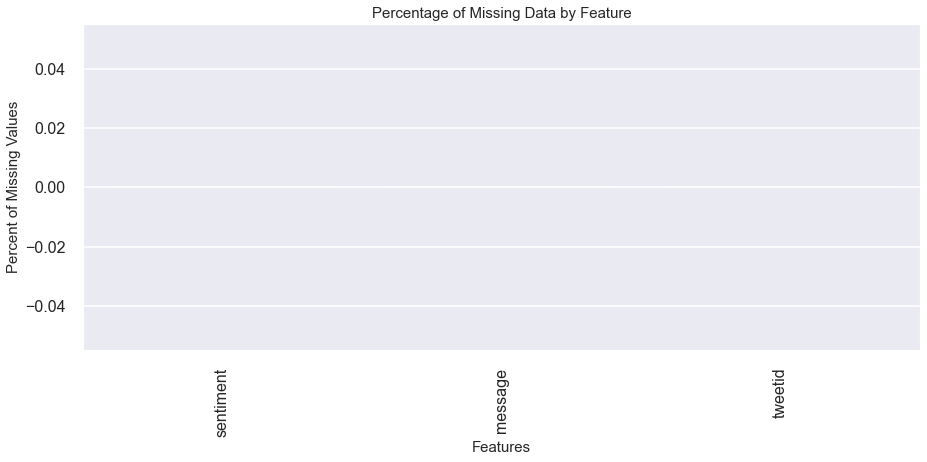

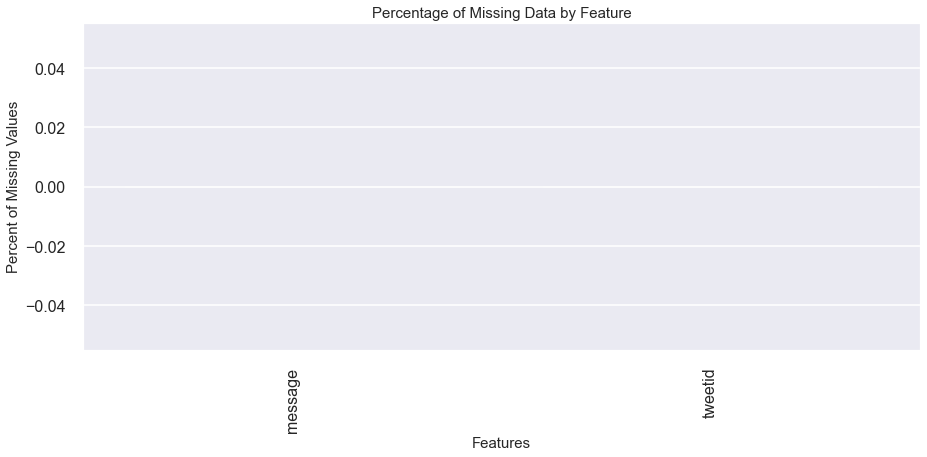

In [13]:
# function to return missing values
def missing_values(df): 
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of Missing Values', fontsize=15)
    plt.title('Percentage of Missing Data by Feature', fontsize=15)
    return (missing_data)

print(missing_values(train_df))
print(missing_values(test_df))

Yes, We have no missing values. Both training and test set have same ratio of missing values in all features.

### Plotting the percentage of Sentimentals (2,1,0 & -1) using Pie chart and Bar graph

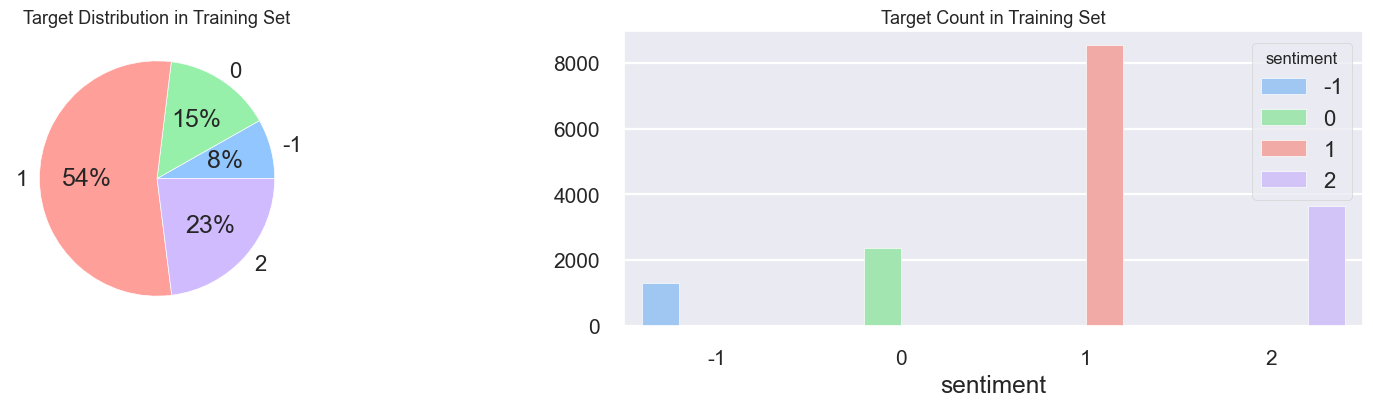

None


In [14]:
# function to plot the target _ distribution
def target_distribution (train) : 
    fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
    plt.tight_layout()

    train.groupby('sentiment').count()['tweetid'].plot(kind='pie', ax=axes[0], labels=['-1','0','1','2'],autopct='%.0f%%')
    sns.countplot(x=train['sentiment'], hue=train['sentiment'], ax=axes[1])

    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    axes[1].set_xticklabels(['-1','0','1','2'])
    axes[0].tick_params(axis='x', labelsize=15)
    axes[0].tick_params(axis='y', labelsize=15)
    axes[1].tick_params(axis='x', labelsize=15)
    axes[1].tick_params(axis='y', labelsize=15)

    axes[0].set_title('Target Distribution in Training Set', fontsize=13)
    axes[1].set_title('Target Count in Training Set', fontsize=13)

    plt.show()

print(target_distribution(train_df))

#### Target distribution percentages info:
 - **54%** of our tweets shows that they believe in man-made climate change(Pro = 1)
 - **23%** of our tweets shows the news about man-made climate change(News = 2)
 - **15%** of our tweets shows that they neither believe or do not believe in man-made climate change (Neutral = 0)
 - **8%** of our tweets show that they do not believe in man-made climate change(Anti = -1)
 - **Imbalanced** The sentiment are not balanced. Which means when we predict our sentiment it will be leaning towards the majority sentimet

### CHARACTER DISTRIBUTION

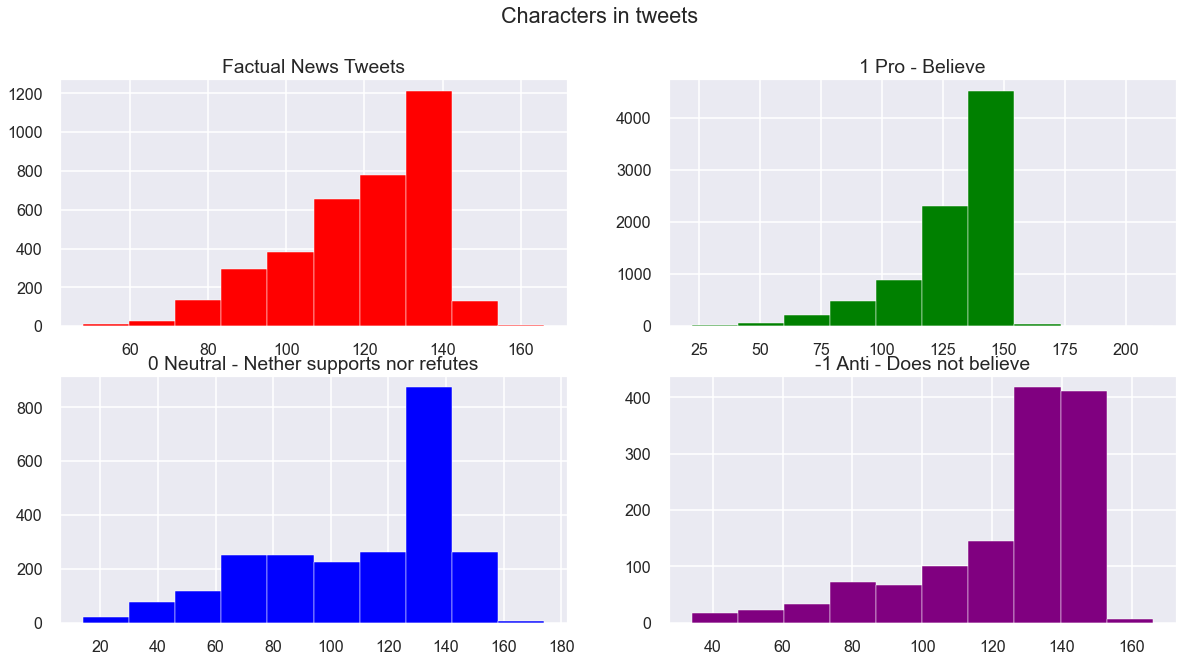

None


In [15]:
# function to plot the caracter _ distribution
def caracter_level_distrubtion (train): 
    fig,((ax1, ax2), (ax3, ax4)) =plt.subplots(2,2,figsize=(20,10))
    
    tweet_len=train[train['sentiment']==2]['message'].str.len() 
    ax1.hist(tweet_len,color='red')
    ax1.set_title('Factual News Tweets')
    
    tweet_len=train[train['sentiment']==1]['message'].str.len()
    ax2.hist(tweet_len,color='green')
    ax2.set_title('1 Pro - Believe')
    
    tweet_len=train[train['sentiment']==0]['message'].str.len()
    ax3.hist(tweet_len,color='blue')
    ax3.set_title('0 Neutral - Nether supports nor refutes')
    
    tweet_len=train[train['sentiment']==-1]['message'].str.len()
    ax4.hist(tweet_len,color='purple')
    ax4.set_title('-1 Anti - Does not believe')
    
    
    fig.suptitle('Characters in tweets')
    plt.show()
    

print(caracter_level_distrubtion(train_df))

#### Observations:
* The distribution of characters  seems to be almost the similar. 
* 130 to 140 character length in a tweet are the most common among all sentiments.
* The distribution of all sentiment are skewed to the left.

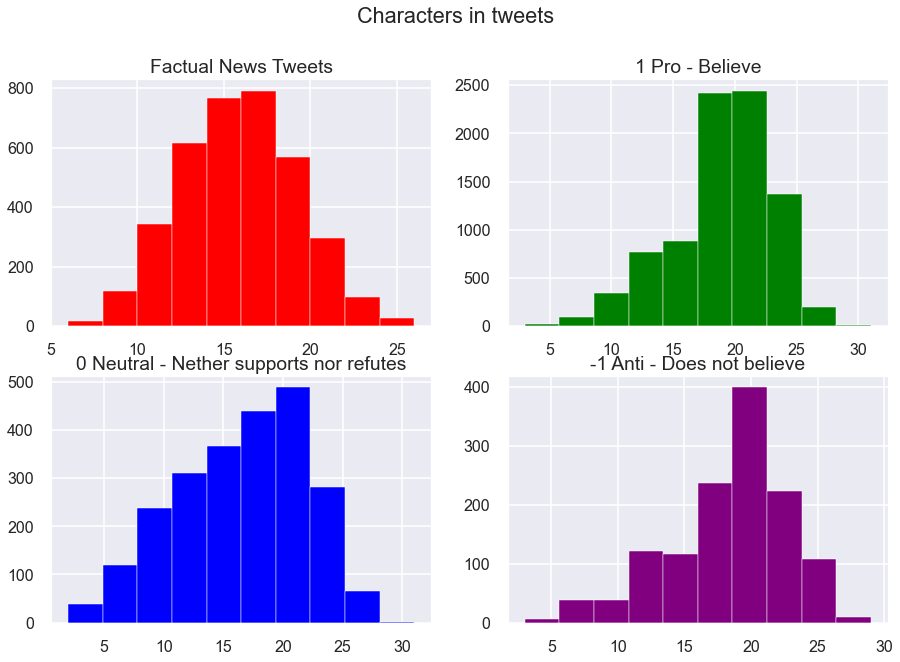

None


In [16]:
# function to plot the word level distrubtion
def word_level_distrubtion (train): 
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,10))
    tweet_len=train[train['sentiment']==2]['message'].str.split().map(lambda x: len(x))
    ax1.hist(tweet_len,color='red')
    ax1.set_title('Factual News Tweets')
    
    tweet_len=train[train['sentiment']==1]['message'].str.split().map(lambda x: len(x))
    ax2.hist(tweet_len,color='green')
    ax2.set_title('1 Pro - Believe')
    
    tweet_len=train[train['sentiment']==0]['message'].str.split().map(lambda x: len(x))
    ax3.hist(tweet_len,color='blue')
    ax3.set_title('0 Neutral - Nether supports nor refutes')
    
    tweet_len=train[train['sentiment']==-1]['message'].str.split().map(lambda x: len(x))
    ax4.hist(tweet_len,color='purple')
    ax4.set_title('-1 Anti - Does not believe')
    
    fig.suptitle('Characters in tweets')
    plt.show()
    
    
print(word_level_distrubtion(train_df))

#### Observations:
* The distribution of words in tweets seems to be almost the similar. 
* The distribution of all sentiment are fairly symmentrical.
* There are no words which are more than 40

### WORD  CLOUD
Let's plot the word cloud for all for different sentimentals tweets

None


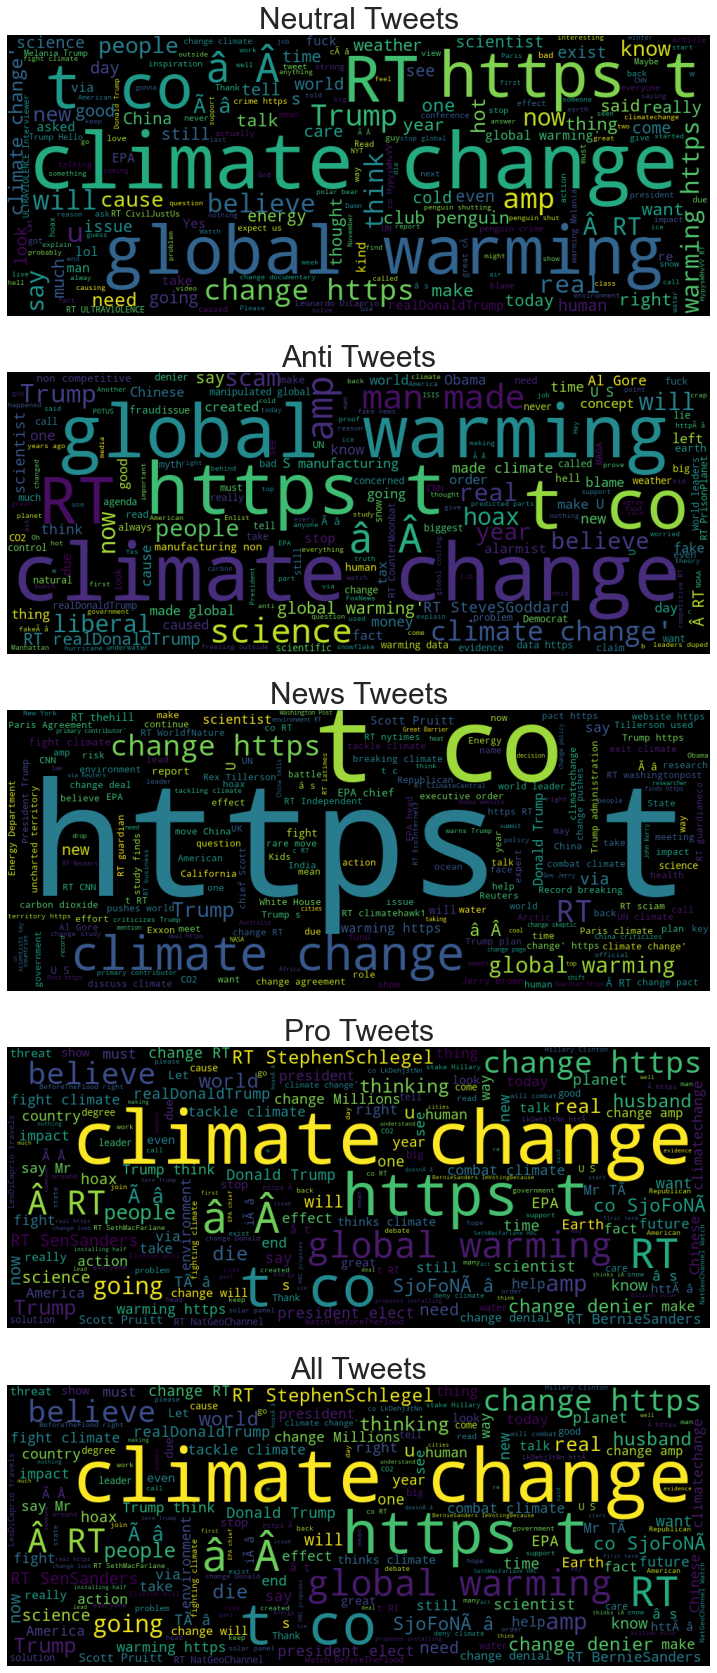

In [17]:
from wordcloud import WordCloud
def WordCloud_plotting (train): 
    
    news_tweets = train[train['sentiment']==2]['message'] #select only news-tweets
    Pro_tweets = train[train['sentiment']==1]['message'] #select only pro-tweets
    neutral_tweets = train[train['sentiment']==0]['message'] #select only neutral-tweets
    anti_tweets = train[train['sentiment']==-1]['message'] #select only anti-tweets
    alll = train['message'] #select only all tweets
    
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(5, 1, figsize=[40, 30])
    
    #Code for Neutral Tweets
    wordcloud1 = WordCloud( background_color='black',width=1000,height=400).generate(" ".join(neutral_tweets)) 
    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('Neutral Tweets',fontsize=30)
    
    #Code for Anti Tweets
    wordcloud2 = WordCloud( background_color='black',width=1000,height=400).generate(" ".join(anti_tweets)) 
    ax2.imshow(wordcloud2)
    ax2.axis('off')
    ax2.set_title('Anti Tweets',fontsize=30)
    
    #Code for News Tweets
    wordcloud3 = WordCloud( background_color='black',width=1000,height=400).generate(" ".join(news_tweets)) 
    ax3.imshow(wordcloud3)
    ax3.axis('off')
    ax3.set_title('News Tweets',fontsize=30)
    
    #Code for Pro Tweets
    wordcloud4 = WordCloud( background_color='black',width=1000,height=400).generate(" ".join(Pro_tweets)) 
    ax4.imshow(wordcloud4)
    ax4.axis('off')
    ax4.set_title('Pro Tweets',fontsize=30)
    
    #Code for All Tweets
    wordcloud5 = WordCloud( background_color='black',width=1000,height=400).generate(" ".join(alll)) 
    ax5.imshow(wordcloud4)
    ax5.axis('off')
    ax5.set_title('All Tweets',fontsize=30);



print(WordCloud_plotting(train_df))

#### Observations:
* **Neutral Tweets:** The words like "climate change", "global warming" and "https" appear to be big which means that they are mosst coomon words in our neutral tweets.
* **Anti Tweets:** Donald Trump appears a lot here. He is probably one of the people who do not believe in global warming. Also words like blame and scam are probably unique in here.
* **News Tweets:** Words like "https" appear a lot. Which probably means the news tweets always reference with a website. 
* **Pro Tweets:** Words like "tackle climate","change" are probably unique in here too.
* **All Tweets:** As expected, words like climate change and global warming are more visible/common.

## Punctuation Frequency

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 405538.17it/s]


None


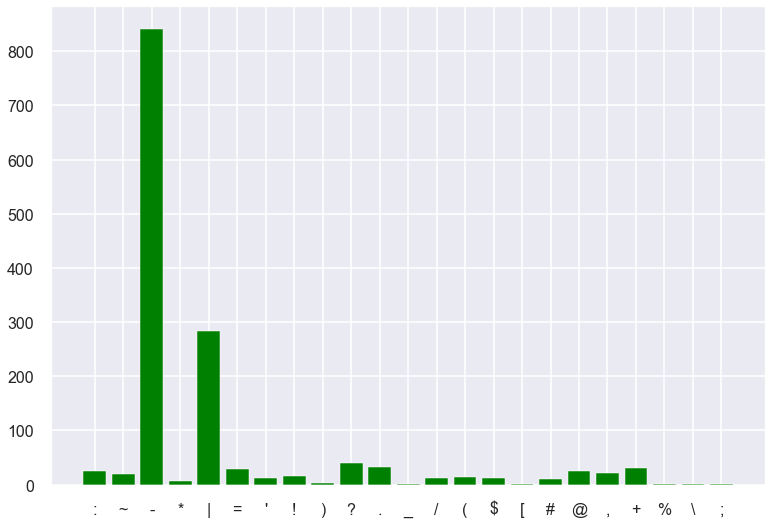

In [18]:
# function to return a dictionnary of punctuation_frequency
def punctuation_frequence(df) : 
    punct = defaultdict(int)
    for word in (List_of_words(df)):
        if word in special:
            punct[word]+=1
    return(punct)

# function to plot a barplot of punctuation
def punct_barplot (punct) : 
    x,y=zip(*punct.items())
    plt.bar(x,y,color='green')
    
punct = punctuation_frequence(train_df) #Store all punctuations
print(punct_barplot(punct)) #Plot all puntuations

#### Observations:
* The "-" punctuation is used a lot in our tweets then "|" is the second most used.
* The least used puntuation are ;\% and -
* We expected @ and # to be mostly used since we are deleaing with tweeter data

## MOST COMMON WORDS

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 428709.76it/s]


None


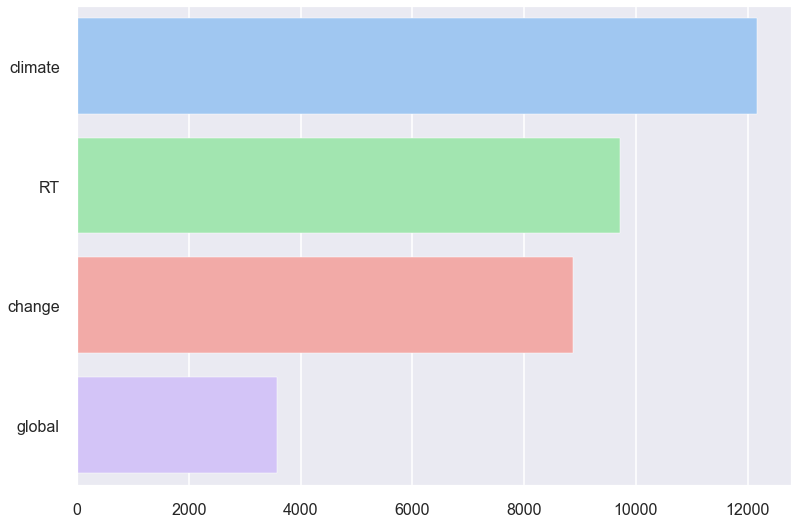

In [19]:
# function to return the most common words
def most_common (df):
    counter=Counter(List_of_words(df))
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:12]: 
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x) 
    
print(most_common(train_df))

#### Observations:
* **Climate"**, **"RT"**,**"change"** and **"global"** are the most common words from our tweets and we are dealing with climate change. 
* This makes sense since it corresponds with our word clouds

## Plotting Most Frequent N-grams

Here we just plot the N-grams of our tweets. But for now we will only plot the most common(i.e bigrams). 
So from bi-grams diagrams we can see that "climate change" is the most in our tweets.

100%|███████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 2326345.32it/s]


None


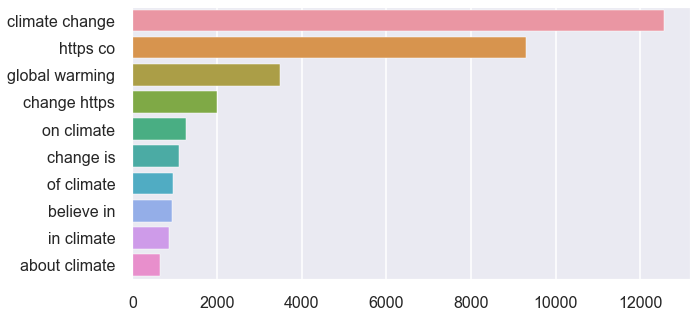

In [20]:
# function to return the top n grams tweets
from sklearn.feature_extraction.text import CountVectorizer
def get_top_tweet_ngrams(corpus,n_gram,lenght): 
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(corpus) 
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:lenght]

# function to graph the top n grams tweets
def plotting_top_ngrams (df): 
    plt.figure(figsize=(10,5))
    top_tweet_bigrams=get_top_tweet_ngrams(df['message'],2,10)[:10]
    x,y=map(list,zip(*top_tweet_bigrams))
    sns.barplot(x=y,y=x)
    
get_top_tweet_ngrams(List_of_tweets(train_df),2,10)
print(plotting_top_ngrams(train_df))

#### Observations:
* climate change is the most common bi-gram words. Makes sense since we are deleaing with tweets about climate change
* Also global warming makes sense that it is one of the most common bi-grams.

<a id="subsection-six"></a>
# Specific Named Entity Recognition
Extracting the top 10 organisations, people and geopolitical entities in each class. This information is then stored in separate dataframes for each class.

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet 
import spacy
from spacy.lang.en import English
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

def lemma(train_df):
    #This function modifies the original train dataframe. A new column for the length of each tweet is added.
    #The tweets are then tokenized and each word is assigned a part of speech tag before being lemmatized
    
    train_df['length'] = train_df['message'].str.len()
    train_df['tokenized'] = train_df['message'].apply(word_tokenize)
    train_df['pos_tags'] = train_df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    train_df['pos_tags'] = train_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    train_df['lemmatized'] = train_df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    train_df['lemmatized'] = [' '.join(map(str, l)) for l in train_df['lemmatized']]  
    return train_df

train_df = lemma(train_df)

def entity_extractor(tweet):
    #This function extracts the top 10 people, organizations and geopolitical entities in a collection of tweets. 
    #The information is then saved in a new dataframe
    
    def get_people(tweet):  
        words = nlp(tweet)
        people = [w.text for w in words.ents if w.label_== 'PERSON']
        return people
    
    def get_org(tweet):
        words = nlp(tweet)
        org = [w.text for w in words.ents if w.label_== 'ORG']
        return org
    
    def get_gpe(tweet):
        words = nlp(tweet)
        gpe = [w.text for w in words.ents if w.label_== 'GPE']
        return gpe
    
    # Extract the top 10 people
    people = tweet.apply(lambda x: get_people(x)) 
    people = [x for sub in people for x in sub]
    people_counter = Counter(people)
    people_count = people_counter.most_common(10)
    people, people_count = map(list, zip(*people_count))
    
    # Extract the top 10 organizations
    org = tweet.apply(lambda x: get_org(x)) 
    org = [x for sub in org for x in sub]
    org_counter = Counter(org)
    org_count = org_counter.most_common(10)
    org, org_count = map(list, zip(*org_count))
    
    # Extract the top 10 geopolitical entities
    gpe = tweet.apply(lambda x: get_gpe(x)) 
    gpe = [x for sub in gpe for x in sub]
    gpe_counter = Counter(gpe)
    gpe_count = gpe_counter.most_common(10)
    gpe, gpe_count = map(list, zip(*gpe_count))
    
    # Create a dataframe to store the information
    df = pd.DataFrame({'people' : people})
    df['geopolitics'] = gpe
    df['organizations'] = org
    
    return df

# Extract top entities for each class
anti_info = entity_extractor(train_df['lemmatized'][train_df['sentiment']==-1])
pro_info = entity_extractor(train_df['lemmatized'][train_df['sentiment']==1])
news_info = entity_extractor(train_df['lemmatized'][train_df['sentiment']==2])
neutral_info = entity_extractor(train_df['lemmatized'][train_df['sentiment']==0])

## Most Common Hashtags

Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

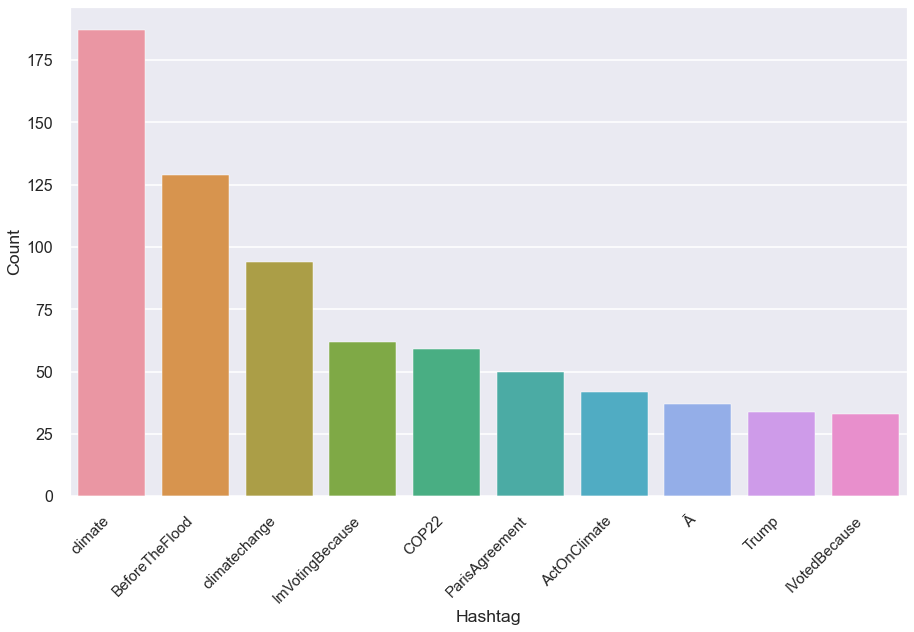

In [22]:
#tokenize
tokenized_tweet = train_df['message'].apply(lambda x: x.split())

##extract hashtahgs
def hashtag_extract(tweets):
    hashtags = []
    ###loop words in tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

##extract sentiment tweets
ht_positive = hashtag_extract(train_df['message'][train_df['sentiment']==1])
ht_factual = hashtag_extract(train_df['message'][train_df['sentiment']==2])
ht_negative = hashtag_extract(train_df['message'][train_df['sentiment']==-1])
ht_neutral = hashtag_extract(train_df['message'][train_df['sentiment']==0])

##unest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_factual = sum(ht_factual, [])
ht_neutral = sum(ht_neutral, [])

#Create dataframe for all hashtags
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                 'Count': list(freq.values())})

##select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x= 'Hashtag', y = 'Count')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small' )
plt.show()

#### Observations:
* As expected the most popular hashtag is **#climate** and also **#climatechange**
* **#BeforeTheFlood**, this hashtag is probably about a disater that is happening because of global warming
* **#ActOnClimate**, this hashtag is probably about an action that has to be done to deal or reduce global warming

### MOST COMMON HASHTAGS PER SENTIMENT

In [23]:
def hashtag_extract(tweet):
    #This function takes in a tweet and extracts the top 15 hashtag(s) using regular expressions
    #These hashtags are stored in a seperate dataframe along with a count of how frequenty they occur

    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")
    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(train_df['message'][train_df['sentiment'] == 1])
anti = hashtag_extract(train_df['message'][train_df['sentiment'] == -1])
neutral = hashtag_extract(train_df['message'][train_df['sentiment'] == 0])
news = hashtag_extract(train_df['message'][train_df['sentiment'] == 2])

### Frequent Hashtags For Pro Tweets

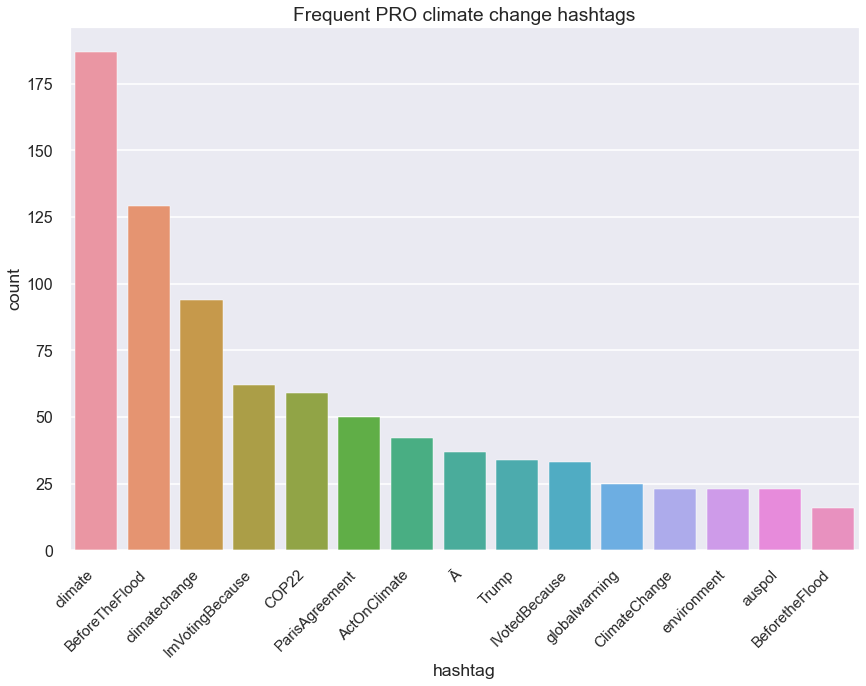

In [24]:
# Plot the frequent hastags for pro climate change classes
sns.barplot(data=pro,x=pro['hashtag'], y=pro['count'])
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small' )
plt.show()

### Frequent Hashtags For ANTI Tweets

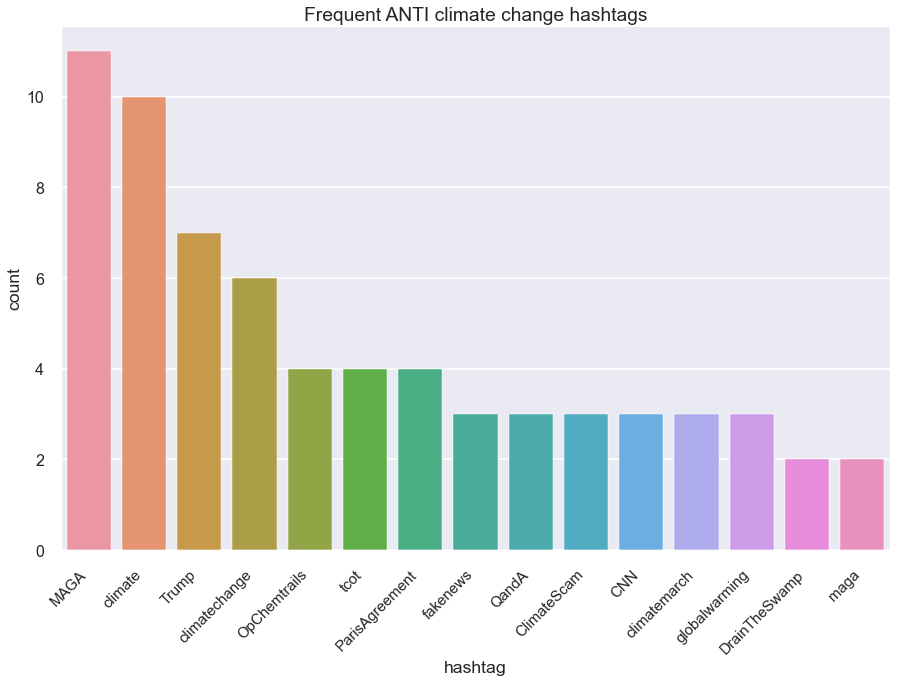

In [25]:
# Plot the frequent hastags for anti climate change classes
sns.barplot(data=anti,x=anti['hashtag'], y=anti['count'])
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small' )
plt.show()

### Frequent Climate Change NEWS Hashtags

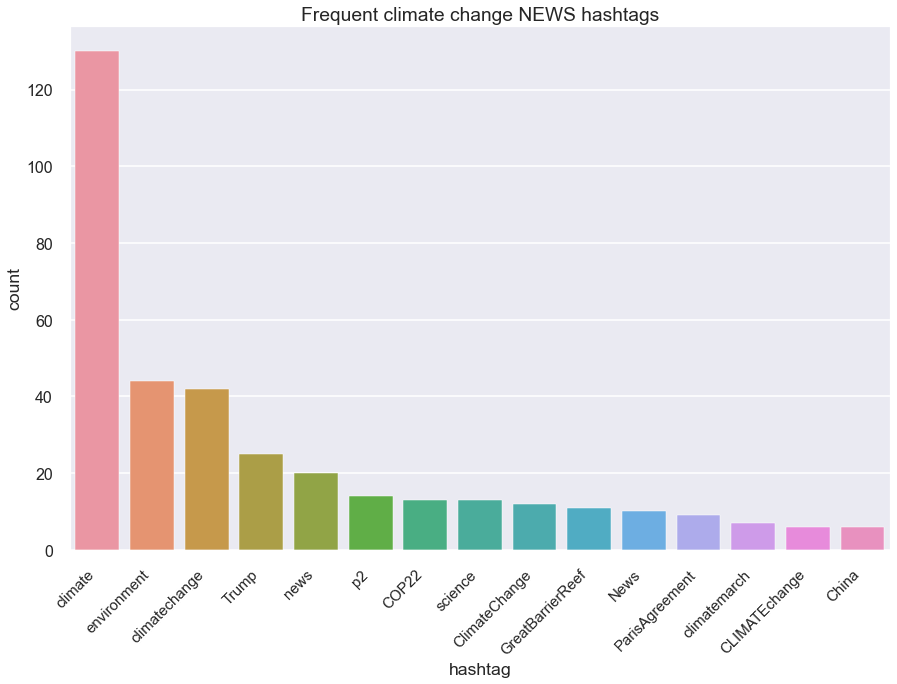

In [26]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(x=news['hashtag'], y=news['count'])
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small')
plt.show()

### Frequent NEUTRAL Climate Change Hashtags

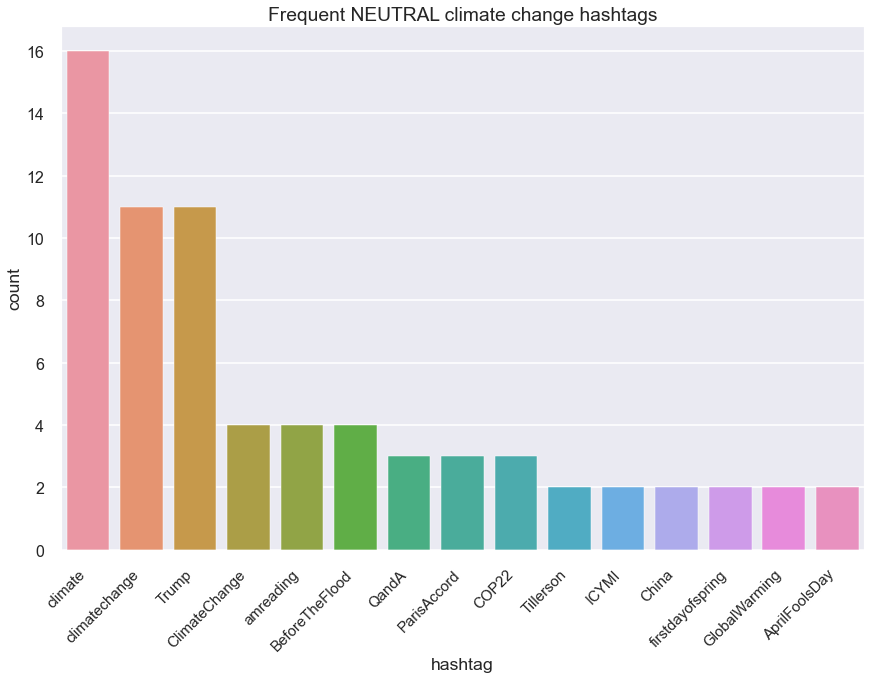

In [27]:
sns.barplot(x=neutral['hashtag'], y=neutral['count'])
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small')
plt.show()

# EDA AFTER RESAMPLING

**As we know our sentiment count stands like this:** 
* **1: 8530**
* **2: 3640** 
* **0: 2353** 
* **-1: 1296**

In [28]:
#Code to count the sumo of each sentiment
from collections import Counter
print('Original dataset shape %s' % Counter(train_df['sentiment']))

Original dataset shape Counter({1: 8530, 2: 3640, 0: 2353, -1: 1296})


**Then after resampling with Over or Under sampler, we get:**
* **OVER : {1: 8530, 2: 8530, 0: 8530, -1: 8530}**
* **UNDER : {-1: 1296, 0: 1296, 1: 1296, 2: 1296}**

In [29]:
from imblearn.over_sampling import RandomOverSampler #import random over sampler
from imblearn.under_sampling import RandomUnderSampler #import random under sampler


ros = RandomOverSampler(random_state=42,sampling_strategy="all")
X_over, y_over = ros.fit_resample(train_df,train_df['sentiment']) #Resample all sentimets with the highest one
print('Resampled Over dataset shape %s' % Counter(y_over))


ros = RandomUnderSampler(random_state=42,sampling_strategy="all")
X_under, y_under = ros.fit_resample(train_df,train_df['sentiment']) #Resample all sentimets with the lowest one
print('\nResampled Under dataset shape %s' % Counter(y_under))

Resampled Over dataset shape Counter({1: 8530, 2: 8530, 0: 8530, -1: 8530})

Resampled Under dataset shape Counter({-1: 1296, 0: 1296, 1: 1296, 2: 1296})


Text(0.5, 1.0, 'Over-sampling')

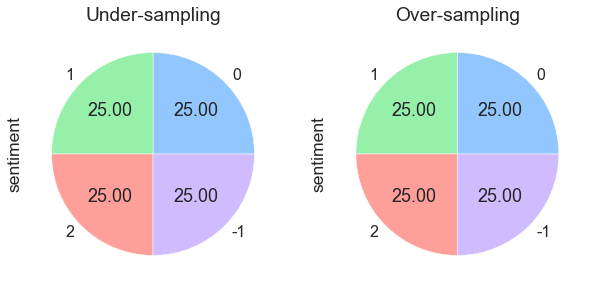

In [30]:
#Pie chart for all our Resampled sentiment
#For the Under sampling
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
y_under.value_counts().plot.pie(autopct="%.2f", ax=axs[0])
axs[0].set_title("Under-sampling")

#For the Over sampling
y_over.value_counts().plot.pie(autopct="%.2f", ax=axs[1])
axs[1].set_title("Over-sampling")

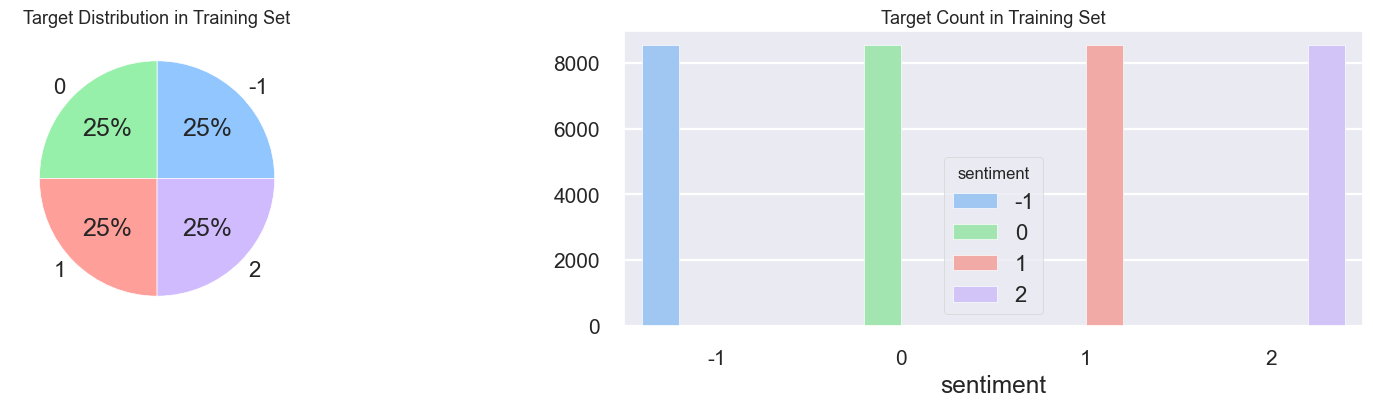

None


In [31]:
print(target_distribution(X_over)) #Print the Over Resampled

#### Observations:
* **25%** of our tweets shows that they believe in man-made climate change(Pro = 1)
* **25%** of our tweets shows the news about man-made climate change(News = 2)
* **25%** of our tweets shows that they neither believe or do not believe in man-made climate change (Neutral = 0)
* **25%** of our tweets show that they do not believe in man-made climate change(Anti = -1)

# DATA CLEANING

In [32]:
#Combine Train and Test data set
df_all = concat_df(train_df,test_df)
resampled_over = concat_df(X_over,test_df)
resampled_under = concat_df(X_under,test_df)

#### As we know,twitter tweets always have to be cleaned before we go into modelling. So we will do some basic cleaning such as removing punctuations,removing html tags and emojis etc. So let's start.

In [33]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"It's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


In [34]:
#Dictionary for short words in tweets
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [35]:
#Dictionary to change emojis to words
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [36]:
#Function to change apostrophy to actual words 
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

#tokenize and remove tweeter handles
def rem2(text) : 
    from nltk.tokenize import TweetTokenizer
    tknzr = TweetTokenizer(strip_handles=True)
    text = text.lower()
    text = ' '.join(tknzr.tokenize(text))
    return (text)

#remove stop words
def remove_stops(text) : 
    remove_stopwords = [w for w in text.split() if w not in stop]
    return ' '.join(remove_stopwords)

# remove URLs
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# remove htmls
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

#remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# remove punct
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

# remove other characters
def remove_other (text) : 
    text = text.lower()
    text = text.replace("'", "")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return(text)

# Full clean ... combination off all the previous functions
def Full_clean (text) :
    text = lookup_dict(text,apostrophe_dict)
    text = lookup_dict(text,short_word_dict)
    text = lookup_dict(text,emoticon_dict)
    text = rem2(text)
    text = remove_stops(text)
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_punct(text)
    text = remove_other(text)
    return(text)

In [37]:
#full clean
df_all['message'] = df_all['message'].apply(lambda x: Full_clean(x)) #Clean the original data
resampled_over['message'] = resampled_over['message'].apply(lambda x: Full_clean(x))#clean the over-resapled data
resampled_under['message'] = resampled_under['message'].apply(lambda x: Full_clean(x))#clean the under-resampled data

### Stemmer/Lemmer

Stemming will not convert original words into meaningful words. As you can see “considered” gets stemmed into “condit” which does not have meaning and a spelling mistake too. The better way is to use Lemmatization instead of stemming process.

Lemmatization is a more powerful operation, and it takes into consideration the morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms.

In [38]:
# function to stemm the text
def stemming (text) : 
    stemmer = nltk.stem.PorterStemmer()
    return(" ".join(stemmer.stem(word) for word in text.split()))

# function to lemm a text 
def lemming (text) : 
    lemmatizer=nltk.stem.WordNetLemmatizer()
    return(" ".join(lemmatizer.lemmatize(word) for word in text.split()))


In [39]:
#So we will choose lemmer
#df_all['cleaned_message_T'] = df_all['cleaned_message_T'].apply(lambda x : stemming(x)) #Stemming

df_all['message'] = df_all['message'].apply(lambda x : lemming(x)) #Lemmitization Original data
resampled_over['message'] = resampled_over['message'].apply(lambda x : lemming(x)) #Lemmitization Over-resampled
resampled_under['message'] = resampled_under['message'].apply(lambda x : lemming(x)) #Lemmitization under-resampled
df_all

lemmatized  \
0      PolySciMajor EPA chief do n't think carbon dioxide be main cause of global warming and .. wait , what ! ? http : //t.co/yeLvcEFXkC via @ mashable   
1                                                                                        It 's not like we lack evidence of anthropogenic global warming   
2      RT @ RawStory : Researchers say we have three year to act on climate change before it ’ s too late http : //t.co/WdT0KdUr2f http : //t.co/Z0ANPT…   
3                                                  # TodayinMaker # WIRED : 2016 be a pivotal year in the war on climate change http : //t.co/44wOTxTLcD   
4                            RT @ SoyNovioDeTodas : It 's 2016 , and a racist , sexist , climate change deny bigot be lead in the poll . # ElectionNight   
...                                                                                                                                                  ...   
26360                                                                                                                                                NaN   
26361                                                                                                                                                NaN   
26362                                                                                                                                                NaN   
26363                                                                                                                                                NaN   
26364                                                                                                                                                NaN   

       length  \
0       140.0   
1        62.0   
2       140.0   
3        99.0   
4       122.0   
...       ...   
26360     NaN   
26361     NaN   
26362     NaN   
26363     NaN   
26364     NaN   

                                                                                         message  \
0                 polyscimajor epa chief think carbon dioxide main cause global warming wait via   
1                                                like lack evidence anthropogenic global warming   
2                                         rt researcher say three year act climate change ’ late   
3                                             todayinmaker wired pivotal year war climate change   
4                       rt racist sexist climate change denying bigot leading poll electionnight   
...                                                                                          ...   
26360  rt brb writing poem climate change climatechange science poetry fakenews alternativefacts   
26361      year climate change came home hottest year record karl mathiesen travelled tasmania …   
26362         rt pacific country positive fiji leading global climate change conference november   
26363                                        rt ’ hot must cause global warming aldublaboroflove   
26364    rt climate change global issue getting worse eating plant based least amount effort h …   

                                                                                                                                                                                                                                                                                                                      pos_tags  \
0      [(PolySciMajor, n), (EPA, n), (chief, n), (does, v), (n't, r), (think, v), (carbon, n), (dioxide, n), (is, v), (main, a), (cause, n), (of, n), (global, a), (warming, n), (and, n), (.., n), (wait, n), (,, n), (what, n), (!, n), (?, n), (https, n), (:, n), (//t.co/yeLvcEFXkC, a), (via, n), (@, n), (mashable, a)]   
1                                                                                                                                                                                           [(It, n), ('s, v), (not, r), (l

# EDA AFTER DATA CLEANING

### WORD CLOUD

None


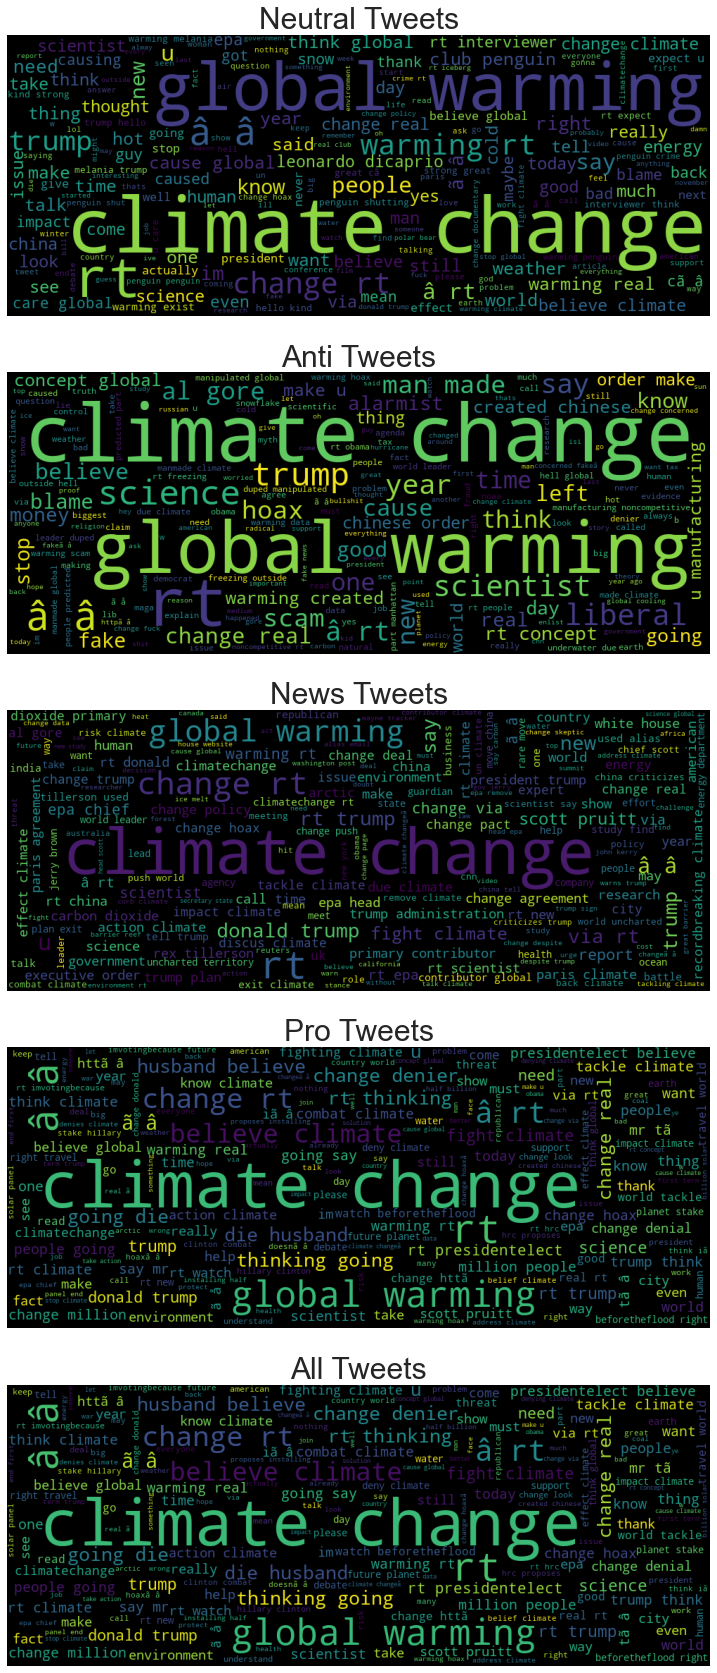

In [40]:
train_df , test_df = divide_df(df_all,train_df.shape[0])# Split df_all into train and test data

print(WordCloud_plotting(train_df))

### MOST COMMON WORDS

100%|████████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 396560.31it/s]


None


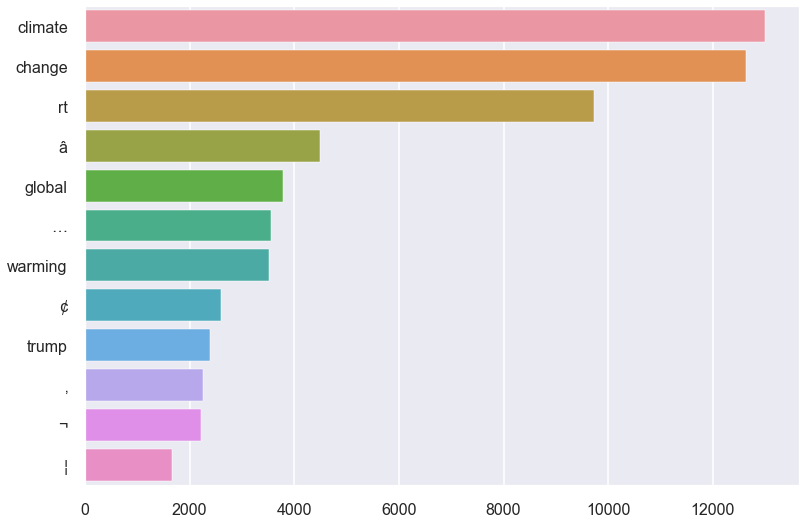

In [41]:
print(most_common(train_df))

## BI - GRAMS

100%|███████████████████████████████████████████████████████████████████████| 15819/15819 [00:00<00:00, 1321759.73it/s]


None


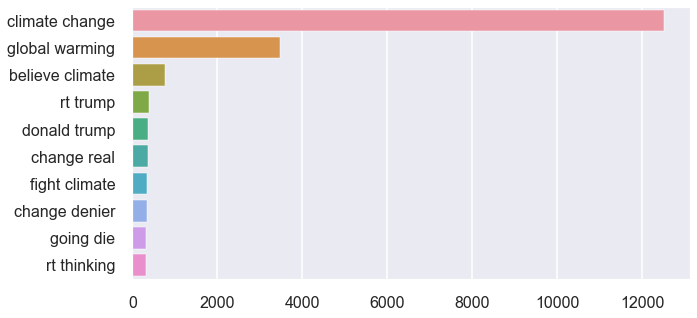

In [42]:
get_top_tweet_ngrams(List_of_tweets(train_df),2,10)
print(plotting_top_ngrams(train_df))

## Character Distributions

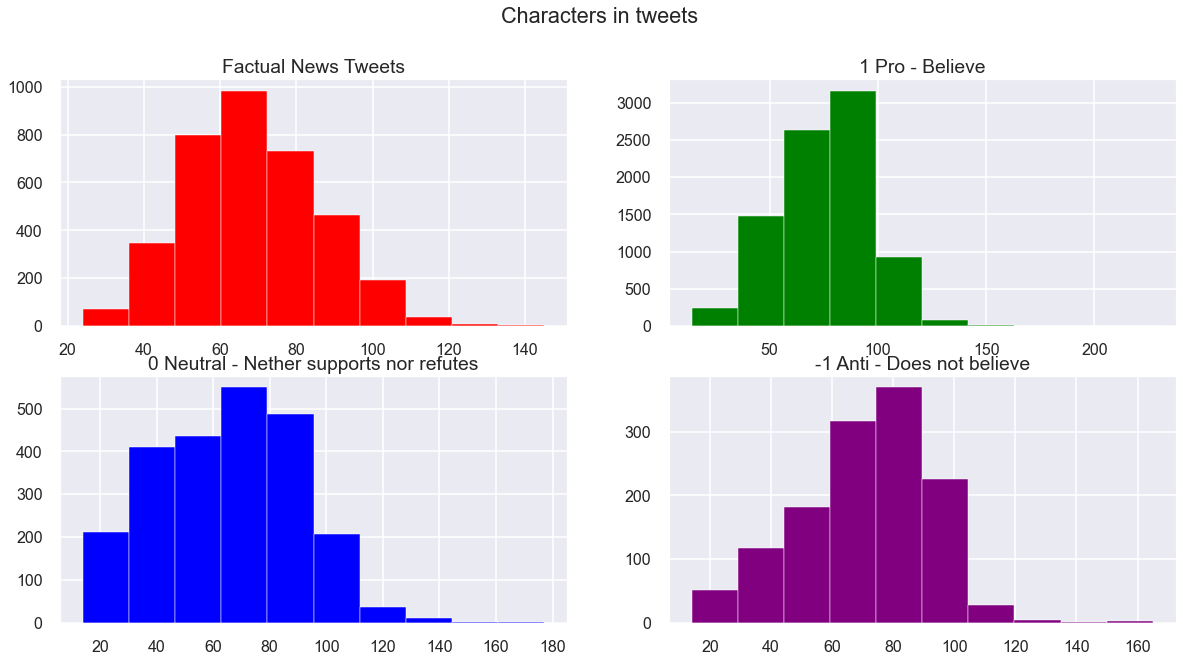

None


In [43]:
print(caracter_level_distrubtion(train_df))

## Words Distributions

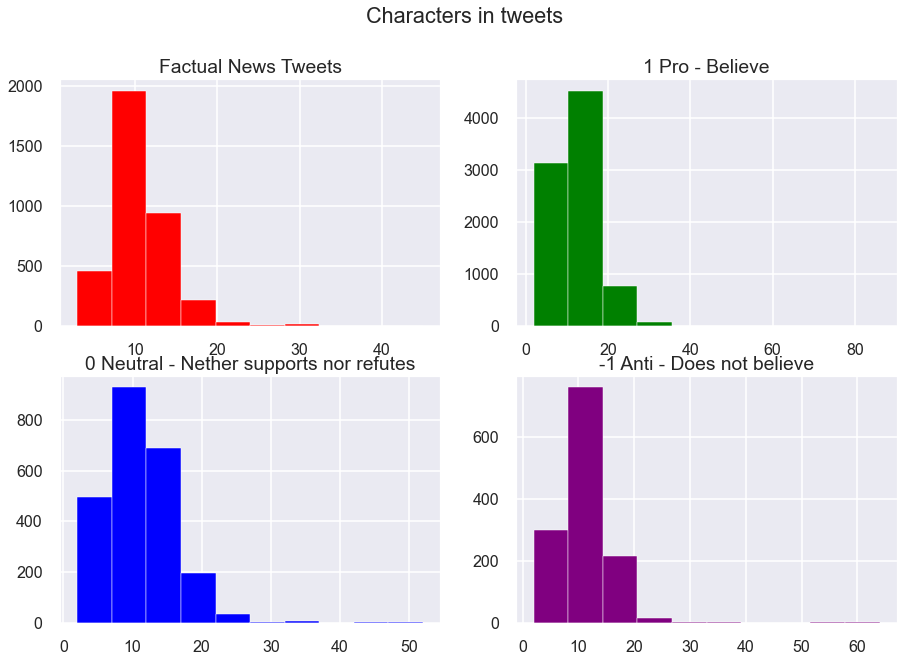

None


In [44]:
print(word_level_distrubtion(train_df))

#### The data clean phase is over. We can now separate the train and test. We use divide_df for that

In [45]:
train_df , test_df = divide_df(df_all,train_df.shape[0])#Split our original data

train_df_r_over , test_df_r_over = divide_df(resampled_over,X_over.shape[0])#Split our original data

train_df_r_under , test_df_r_under = divide_df(resampled_under,X_under.shape[0])#Split our original data

# <u><b>Spitting Our Dataset into Training And Testing Dataset

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train_df['message'],train_df['sentiment'],test_size = 0.1,random_state=0) #split our train data set into two train and test of 20%

XT_O, XE_O, yt_O, ye_O = train_test_split(train_df_r_over['message'],train_df_r_over['sentiment'],test_size = 0.1,random_state=0)#For over resample

XT_U, XE_U, yt_U, ye_U = train_test_split(train_df_r_under['message'],train_df_r_under['sentiment'],test_size = 0.1,random_state=0)#For under resample

print("FOR OUR ORIGINAL DATA BEFORE RESAMPLING: ")
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

print("\nFOR OUR DATA AFTER OVER-RESAMPLING: ")
print("X_train shape : ", XT_O.shape)
print("X_test shape : ", XE_O.shape)
print("y_train shape : ", yt_O.shape)
print("y_test shape : ", ye_O.shape)

print("\nFOR OUR DATA AFTER UNDER-RESAMPLING: ")
print("X_train shape : ", XT_U.shape)
print("X_test shape : ", XE_U.shape)
print("y_train shape : ", yt_U.shape)
print("y_test shape : ", ye_U.shape)

FOR OUR ORIGINAL DATA BEFORE RESAMPLING: 
X_train shape :  (14237,)
X_test shape :  (1582,)
y_train shape :  (14237,)
y_test shape :  (1582,)

FOR OUR DATA AFTER OVER-RESAMPLING: 
X_train shape :  (30708,)
X_test shape :  (3412,)
y_train shape :  (30708,)
y_test shape :  (3412,)

FOR OUR DATA AFTER UNDER-RESAMPLING: 
X_train shape :  (4665,)
X_test shape :  (519,)
y_train shape :  (4665,)
y_test shape :  (519,)


#  MODELS

The following 5 models will be considered:
- 1. Logistic regression
- 2. Linear SVC
- 3. Stochastic Gradient Descent-SGD Classifier

# <u><b> 1. Logistic Regression

Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

Logistic regression has been rated as the best performing model for linearly separable data especially if it's predicting binary data(Yes & NO or 1 & 0), and performs better when there's no class imbalance. 

The figure below is the sigmoid function logistic regression models use to make predictions:

![1*a5QwiyaSyvRa6n3VKYVEnQ.png](https://cdn-media-1.freecodecamp.org/images/1*a5QwiyaSyvRa6n3VKYVEnQ.png)


### Pipeline

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.pipeline import Pipeline
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))


#Define the Logistic Regression for the imbalanced data
text_clf_O = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', LogisticRegression(C=10,multi_class = 'ovr',class_weight='balanced'))])

#Define the Logistic Regression for the OVER-Resambled data
text_clf_RO = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', LogisticRegression(C=10,multi_class = 'ovr'))])

#Define the Logistic Regression for the UNDER-Resambled data
text_clf_RU = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', LogisticRegression(C=10,multi_class = 'ovr'))])

### Fitting Model

In [48]:
# For Our imbalanced Data
text_clf_O = text_clf_O.fit(X_train, y_train) 

# For Our Over-Resampled Data
text_clf_RO = text_clf_RO.fit(XT_O, yt_O) 

# For Our Under-Resampled Data
text_clf_RU = text_clf_RU.fit(XT_U, yt_U) 

### Evaluating Model

#### 1.1 For the imbalanced data

In [49]:
#Predicting Sentiment from X_test
logreg_prediction = text_clf_O.predict(X_test) 
logreg_accuracy = f1_score(y_test,logreg_prediction, average='weighted')

print("\nEvaluation for imbalanced Data: ")
print("Training accuracy Score    : ",text_clf_O.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print("\nClassification report: \n" ,classification_report(logreg_prediction,y_test))


Evaluation for imbalanced Data: 
Training accuracy Score    :  0.9961368265786331
Testing accuracy Score :  0.7293863057186545

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.47      0.63      0.54        98
         0.0       0.56      0.52      0.54       231
         1.0       0.79      0.80      0.80       838
         2.0       0.78      0.73      0.76       415

    accuracy                           0.73      1582
   macro avg       0.65      0.67      0.66      1582
weighted avg       0.74      0.73      0.73      1582



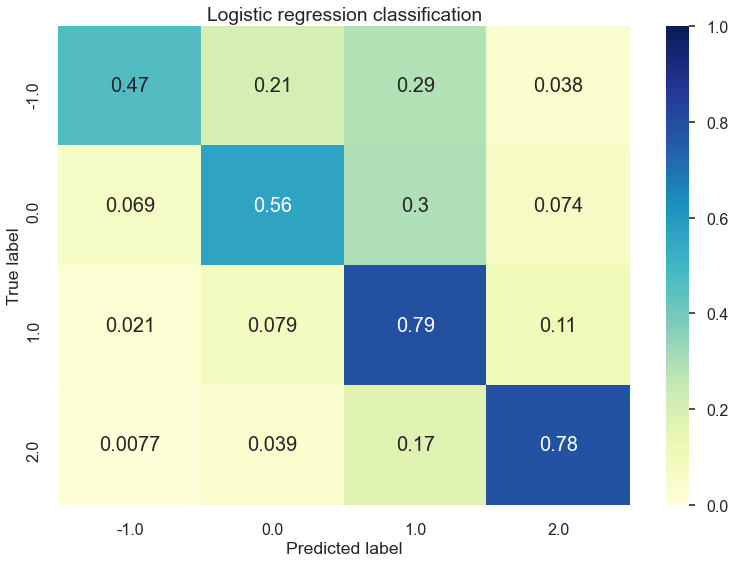

In [50]:
cm = confusion_matrix(y_test, logreg_prediction)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=text_clf_O.classes_, 
            yticklabels=text_clf_O.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:

- Logistic regression is able to successfully classify the tweets.
- This model classifies most tweets successfully with clear boundaries and less confusion  surrounding the pro climate change class.
- The precision, accuracy and F1 scores have improved significantly for the pro, anti and neutral classes.
- There is a drop in the F1 score for the pro climate change class as the predictions become more balanced.
- The overall F1 score is 0.729 which is on target. 

#### 1.2 For The Over-Resampled Data

In [51]:
#Predicting Sentiment from X_test from the OVER resampled
logreg_prediction1 = text_clf_RO.predict(XE_O) 
logreg_accuracy1 = f1_score(ye_O,logreg_prediction1, average='weighted')

print("\nEvaluation for OVER-sampled Data: ")
print("Training accuracy Score    : ",text_clf_RO.score(XT_O,yt_O))
print("Testing accuracy Score : ",logreg_accuracy1 )
print("\nClassification report: \n" ,classification_report(logreg_prediction1,ye_O))


Evaluation for OVER-sampled Data: 
Training accuracy Score    :  0.9970691676436108
Testing accuracy Score :  0.9401015371854263

Classification report: 
               precision    recall  f1-score   support

        -1.0       1.00      0.96      0.97       855
         0.0       0.97      0.93      0.95       936
         1.0       0.82      0.96      0.88       729
         2.0       0.97      0.93      0.95       892

    accuracy                           0.94      3412
   macro avg       0.94      0.94      0.94      3412
weighted avg       0.95      0.94      0.94      3412



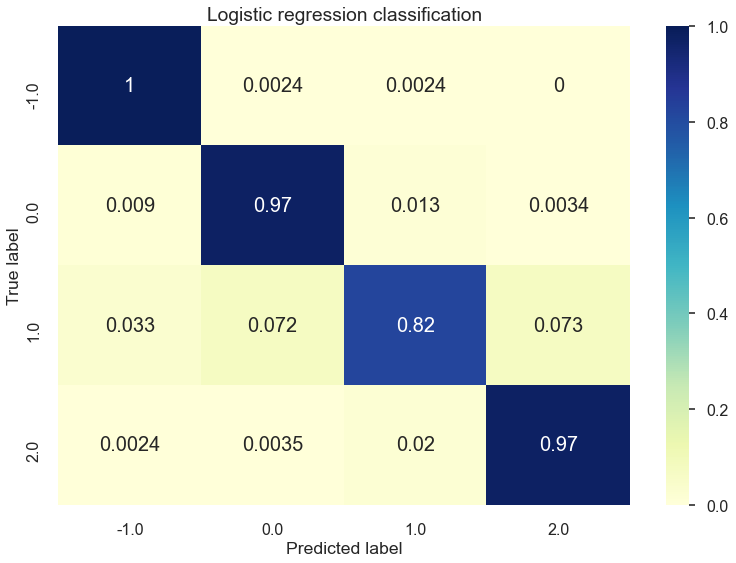

In [52]:
#Code To display the confusion matrix for Over resampled data
cm = confusion_matrix(ye_O, logreg_prediction1)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=text_clf_RO.classes_, 
            yticklabels=text_clf_RO.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:

- Logistic regression is able to successfully classify the tweets.
- This model classifies most tweets successfully with clear boundaries and less confusion  surrounding the pro climate change class.
- The precision, accuracy and F1 scores have improved significantly for the pro, anti and neutral classes.
- There is no drop in the F1 score for the pro climate change class as the predictions become more balanced.
- The overall F1 score is 0.940 which is on target.

#### 1.3 For UNDER-Resampled Data

In [53]:
#Predicting Sentiment from X_test from the UNDER resampled
logreg_prediction2 = text_clf_RU.predict(XE_U) 
logreg_accuracy2 = f1_score(ye_U,logreg_prediction2, average='weighted')

print("\nEvaluation for UNDER-sampled Data: ")
print("Training accuracy Score    : ",text_clf_RU.score(XT_U,yt_U))
print("Testing accuracy Score : ",logreg_accuracy2 )
print("\nClassification report: \n" ,classification_report(logreg_prediction2,ye_U))


Evaluation for UNDER-sampled Data: 
Training accuracy Score    :  0.9980707395498393
Testing accuracy Score :  0.6481305478324987

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.65      0.68      0.66       127
         0.0       0.63      0.63      0.63       125
         1.0       0.58      0.66      0.62       119
         2.0       0.74      0.63      0.68       148

    accuracy                           0.65       519
   macro avg       0.65      0.65      0.65       519
weighted avg       0.66      0.65      0.65       519



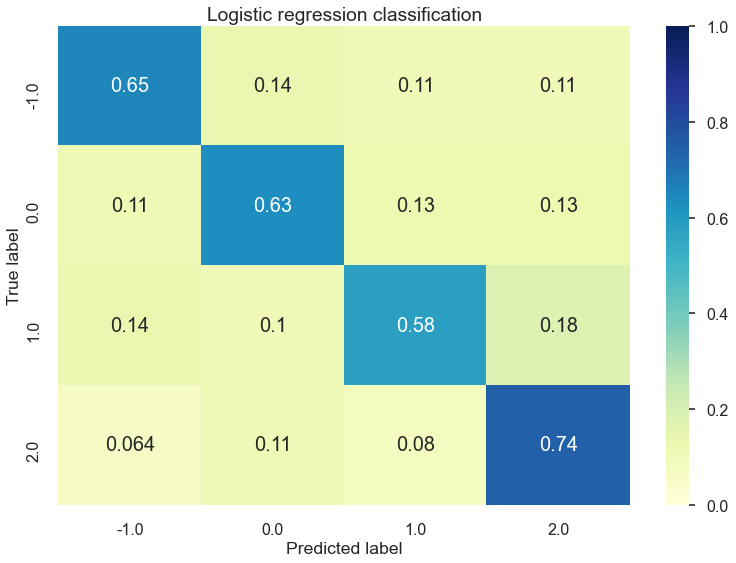

In [54]:
#Code To display the confusion matrix for under resampled data
cm = confusion_matrix(ye_U, logreg_prediction2)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=text_clf_RU.classes_, 
            yticklabels=text_clf_RU.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:

- Logistic regression is able to successfully classify the tweets.
- The precision, accuracy and F1 scores did not improved  for all classes.
- There is a drop in the F1 score in all climate change class as the predictions become more balanced.
- The overall F1 score is 0.648 which is on target.

# <u><b> 2. Stochastic Gradient Descent-SGD Classifier 

* Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression. It has been successfully applied to large-scale datasets because the update to the coefficients is performed for each training instance, rather than at the end of instances.

* Stochastic Gradient Descent (SGD) classifier basically implements a plain SGD learning routine supporting various loss functions and penalties for classification.

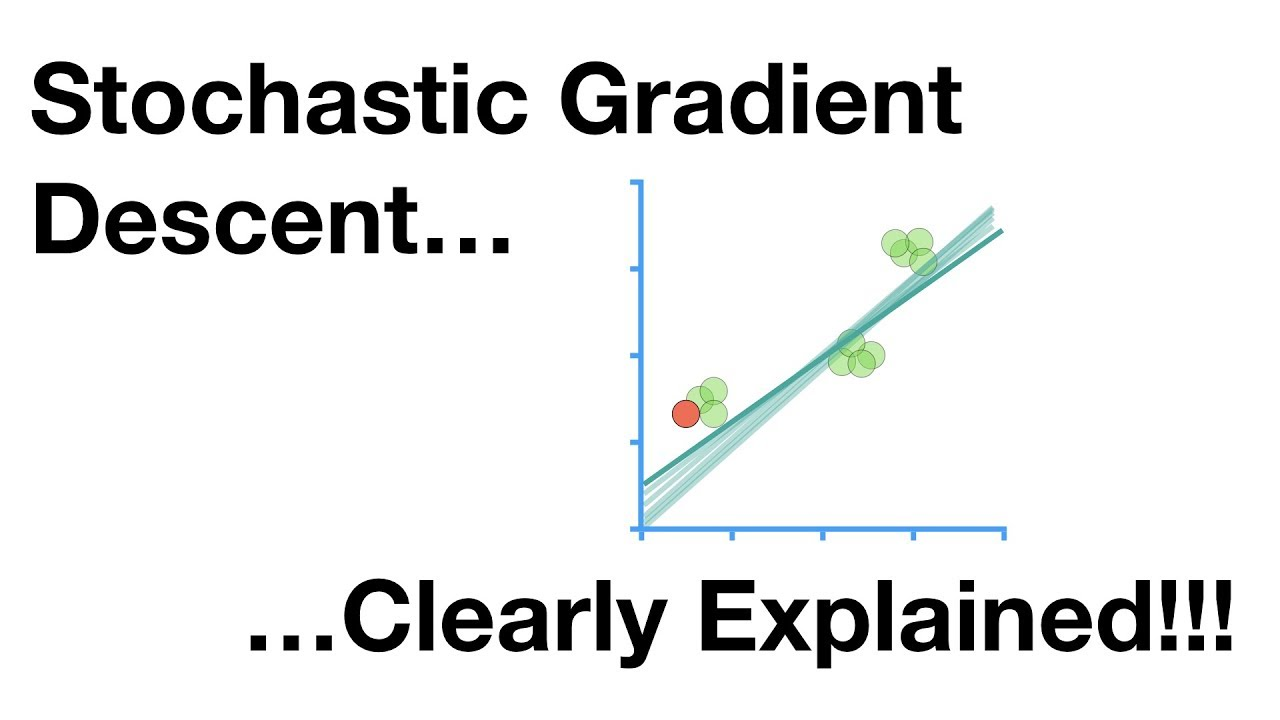

### Pipeline
We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

In [55]:
from sklearn.linear_model import SGDClassifier

#Define the Stochastic Gradient Descent For imbalaced Data
sgd_clf_O = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', SGDClassifier(random_state=42))])

#Define the Stochastic Gradient Descent For Over-Resampled Data
sgd_clf_RO = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', SGDClassifier(random_state=42))])

#Define the Stochastic Gradient Descent For Under-Resampled Data
sgd_clf_RU = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', SGDClassifier(random_state=42))])

### Fitting Model

In [56]:
 # For Imbalanced Data
sgd_clf_O = sgd_clf_O.fit(X_train, y_train)

# For Our Over-Resampled Data
sgd_clf_RO = sgd_clf_RO.fit(XT_O, yt_O) 

# For Our Under-Resampled Data
sgd_clf_RU = sgd_clf_RU.fit(XT_U, yt_U) 

### Evaluation
#### 1.1 FOR IMBALANCED DATA

In [57]:
sgd_prediction = sgd_clf_O.predict(X_test) #Predicting Sentiment from X_test
sgd_accuracy = f1_score(y_test,sgd_prediction, average='weighted')

print("\nEvaluation for ORIGINAL Data: ")
print("Training accuracy Score    : ",sgd_clf_O.score(X_train,y_train))
print("Testing accuracy Score : ",sgd_accuracy )
print("\nClassification report: \n" ,classification_report(sgd_prediction,y_test))


Evaluation for ORIGINAL Data: 
Training accuracy Score    :  0.9933974854253003
Testing accuracy Score :  0.7207235754348259

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.41      0.77      0.54        71
         0.0       0.52      0.51      0.51       220
         1.0       0.83      0.76      0.79       920
         2.0       0.72      0.76      0.74       371

    accuracy                           0.73      1582
   macro avg       0.62      0.70      0.65      1582
weighted avg       0.74      0.73      0.73      1582



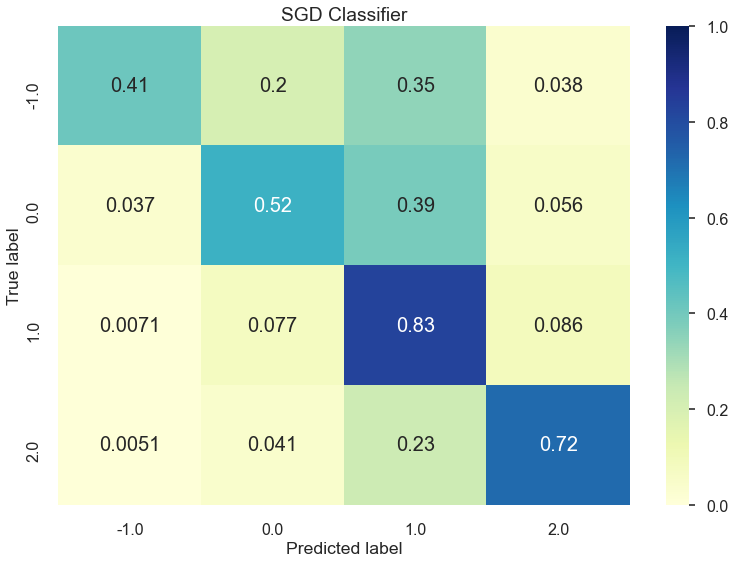

In [58]:
#Code To display the confusion matrix for Imbalanced Data
cm = confusion_matrix(y_test, sgd_prediction)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=sgd_clf_O.classes_, 
            yticklabels=sgd_clf_O.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('SGD Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:
- Stochastic Gradient Descent is able to successfully classify the tweets.
- The precision, accuracy and F1 scores did improved  for all classes.
- There is a drop in the F1 score in all climate change class.
- The overall F1 score is 0.720 which is on target.

#### 1.2 FOR OVER-RESAMPLED DATA

In [59]:
#Predicting Sentiment from X_test from the OVER resampled
sgd_prediction1 = sgd_clf_RO.predict(XE_O) 
sgd_accuracy1 = f1_score(ye_O,sgd_prediction1, average='weighted')

print("\nEvaluation for OVER-sampled Data: ")
print("Training accuracy Score    : ",sgd_clf_RO.score(XT_O,yt_O))
print("Testing accuracy Score : ",sgd_accuracy1 )
print("\nClassification report: \n" ,classification_report(sgd_prediction1,ye_O))


Evaluation for OVER-sampled Data: 
Training accuracy Score    :  0.9941709000911815
Testing accuracy Score :  0.9439146502059332

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.99      0.97      0.98       839
         0.0       0.97      0.92      0.95       941
         1.0       0.84      0.96      0.89       739
         2.0       0.98      0.93      0.95       893

    accuracy                           0.94      3412
   macro avg       0.94      0.95      0.94      3412
weighted avg       0.95      0.94      0.95      3412



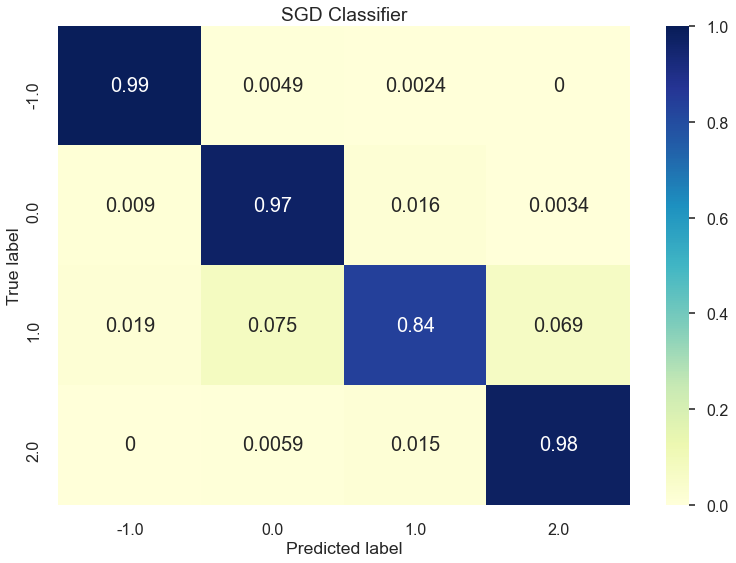

In [60]:
#Code To display the confusion matrix for Over-Resampled Data
cm = confusion_matrix(ye_O, sgd_prediction1)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=sgd_clf_RO.classes_, 
            yticklabels=sgd_clf_RO.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('SGD Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:
- Stochastic Gradient Descent is able to successfully classify the tweets.
- The precision, accuracy and F1 scores did improved  for all classes.
- There is a no drop in the F1 score in all climate change class. All classes improved a lot
- The overall F1 score is 0.943 which is on target.

#### 1.2 FOR UNDER-RESAMPLED DATA

In [61]:
#Predicting Sentiment from X_test from the UNDER resampled
sgd_prediction2 = sgd_clf_RU.predict(XE_U) 
sgd_accuracy2 = f1_score(ye_U,sgd_prediction2, average='weighted')

print("\nEvaluation for UNDER-sampled Data: ")
print("Training accuracy Score    : ",sgd_clf_RU.score(XT_U,yt_U))
print("Testing accuracy Score : ",sgd_accuracy2 )
print("\nClassification report: \n" ,classification_report(sgd_prediction2,ye_U))


Evaluation for UNDER-sampled Data: 
Training accuracy Score    :  0.9969989281886388
Testing accuracy Score :  0.6418160363545484

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.63      0.69      0.66       121
         0.0       0.64      0.65      0.65       123
         1.0       0.55      0.63      0.59       120
         2.0       0.76      0.61      0.68       155

    accuracy                           0.64       519
   macro avg       0.65      0.65      0.64       519
weighted avg       0.65      0.64      0.65       519



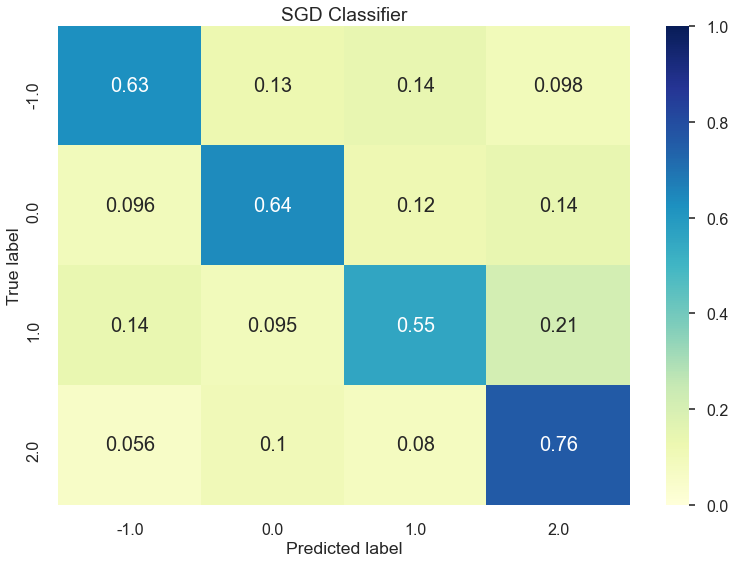

In [62]:
#Code To display the confusion matrix for Over-Resampled Data
cm = confusion_matrix(ye_U, sgd_prediction2)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=sgd_clf_RU.classes_, 
            yticklabels=sgd_clf_RU.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('SGD Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:
- Stochastic Gradient Descent is able to successfully classify the tweets.
- The precision, accuracy and F1 scores did not improved  for all classes.
- There is a drop in the F1 score in all climate change class.
- The overall F1 score is 0.641 which is on target.

# <u><b> 3. Support Vector Machine

In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. The goal of the SVM algorithm is to create the best line or decision boundary that can seperate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane

SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

![support-vector-machine-algorithm.png](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

### Pipeline
We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

In [63]:
from sklearn.svm import SVC

#Define the Stochastic Gradient Descent For Imbalanced data
svc_clf_O = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', SVC(kernel='linear'))])

#Define the Stochastic Gradient Descent for Over-Resampled Data
svc_clf_RO = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', SVC(kernel='linear'))])

#Define the Stochastic Gradient Descent For Under-Resampled Data
svc_clf_RU = Pipeline([('vect', CountVectorizer(stop_words = stop,ngram_range=(1, 2))),
                    ('clf', SVC(kernel='linear'))])

### Fitting Model

In [64]:
# For Our Original Data
svc_clf_O = svc_clf_O.fit(X_train, y_train)

# For Our Over-Resampled Data
svc_clf_RO = svc_clf_RO.fit(XT_O, yt_O) 

 # For Our Under-Resampled Data
svc_clf_RU = svc_clf_RU.fit(XT_U, yt_U)

### Evaluation 
#### 1.1 FOR IMBALANCED DATA

In [65]:
#Predicting Sentiment from X_test
svc_prediction = svc_clf_O.predict(X_test) 
svc_accuracy = f1_score(y_test,svc_prediction, average='weighted')

print("\nEvaluation for ORIGINAL Data: ")
print("Training accuracy Score    : ",svc_clf_O.score(X_train,y_train))
print("Testing accuracy Score : ",svc_accuracy )
print("\nClassification report: \n" ,classification_report(svc_prediction,y_test))


Evaluation for ORIGINAL Data: 
Training accuracy Score    :  0.9943808386598301
Testing accuracy Score :  0.7313240850406378

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.45      0.72      0.56        83
         0.0       0.55      0.52      0.54       227
         1.0       0.83      0.78      0.80       893
         2.0       0.73      0.75      0.74       379

    accuracy                           0.73      1582
   macro avg       0.64      0.70      0.66      1582
weighted avg       0.75      0.73      0.74      1582



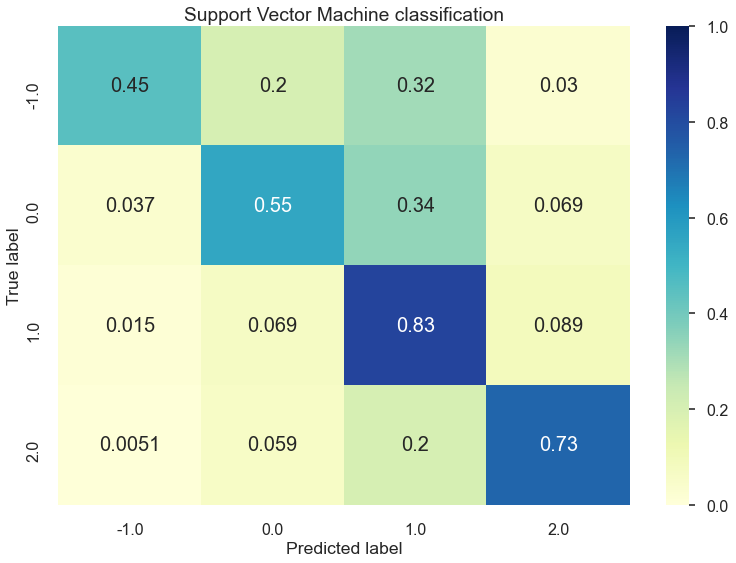

In [66]:
#Code To display the confusion matrix for Under-Resampled Data
cm = confusion_matrix(y_test, svc_prediction)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=svc_clf_O.classes_, 
            yticklabels=svc_clf_O.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Support Vector Machine classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:
- Support Vector Machine is able to successfully classify the tweets.
- The precision, accuracy and F1 scores did not improved  for all classes.
- There is a drop in the F1 score in all climate change class.
- The overall F1 score is 0.731 which is on target.

#### 1.2 FOR OVER-RESAMPLED DATA

In [67]:
#Predicting Sentiment from X_test from the OVER resampled
svc_prediction1 = svc_clf_RO.predict(XE_O) 
svc_accuracy1 = f1_score(ye_O,svc_prediction1, average='weighted')

print("\nEvaluation for OVER-sampled Data: ")
print("Training accuracy Score    : ",svc_clf_RO.score(XT_O,yt_O))
print("Testing accuracy Score : ",svc_accuracy1 )
print("\nClassification report: \n" ,classification_report(svc_prediction1,ye_O))



Evaluation for OVER-sampled Data: 
Training accuracy Score    :  0.9965481307802527
Testing accuracy Score :  0.9395562827353635

Classification report: 
               precision    recall  f1-score   support

        -1.0       1.00      0.96      0.98       848
         0.0       0.97      0.92      0.95       943
         1.0       0.82      0.95      0.88       732
         2.0       0.97      0.93      0.95       889

    accuracy                           0.94      3412
   macro avg       0.94      0.94      0.94      3412
weighted avg       0.95      0.94      0.94      3412



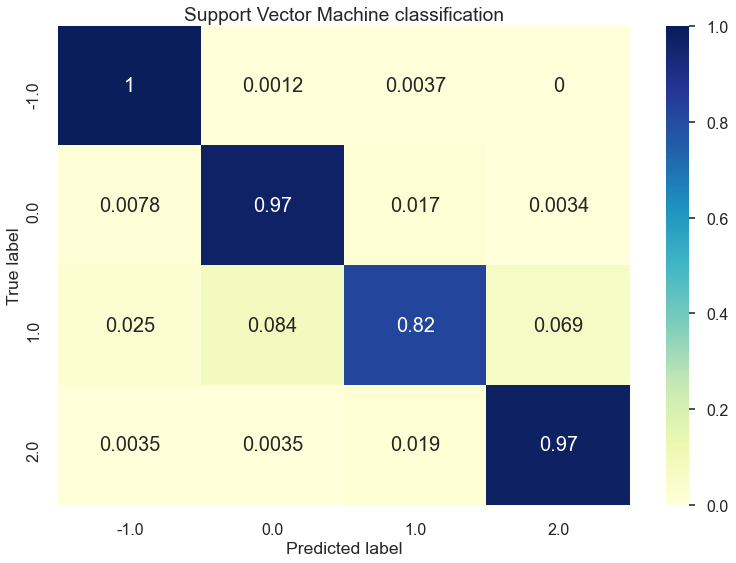

In [68]:
#Code To display the confusion matrix for Under-Resampled Data
cm = confusion_matrix(ye_O, svc_prediction1)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=svc_clf_RO.classes_, 
            yticklabels=svc_clf_RO.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Support Vector Machine classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:
- Support Vector Machine is able to successfully classify the tweets.
- The precision, accuracy and F1 scores did improved  for all classes.
- There is a rise in the F1 score in all climate change class.
- The overall F1 score is 0.939 which is on target.

#### 1.3 FOR UNDER-RESAMPLED DATA 

In [69]:
#Predicting Sentiment from X_test from the UNDER resampled
svc_prediction2 = svc_clf_RU.predict(XE_U) 
svc_accuracy2 = f1_score(ye_U,svc_prediction2, average='weighted')

print("\nEvaluation for UNDER-sampled Data: ")
print("Training accuracy Score    : ",svc_clf_RU.score(XT_U,yt_U))
print("Testing accuracy Score : ",svc_accuracy2 )
print("\nClassification report: \n" ,classification_report(svc_prediction2,ye_U))


Evaluation for UNDER-sampled Data: 
Training accuracy Score    :  0.9969989281886388
Testing accuracy Score :  0.6245667972015643

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.64      0.62      0.63       136
         0.0       0.64      0.56      0.60       143
         1.0       0.51      0.67      0.58       104
         2.0       0.72      0.66      0.69       136

    accuracy                           0.63       519
   macro avg       0.63      0.63      0.63       519
weighted avg       0.64      0.63      0.63       519



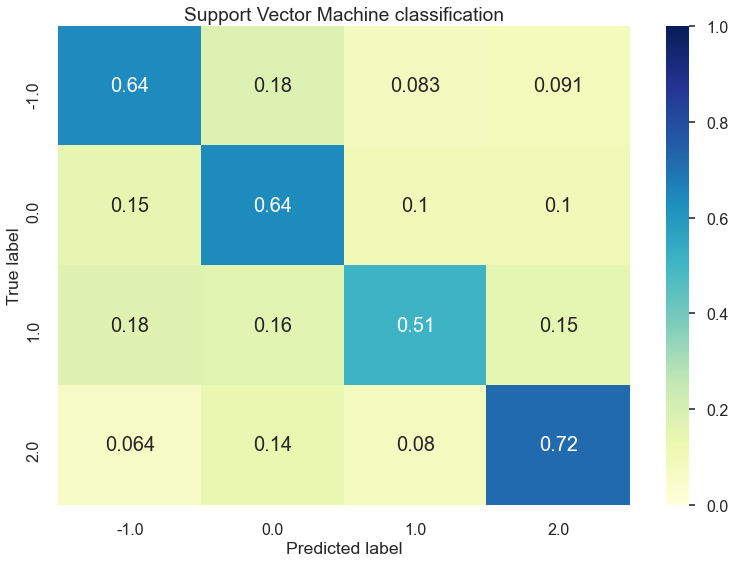

In [70]:
#Code To display the confusion matrix for Under-Resampled Data
cm = confusion_matrix(ye_U, svc_prediction2)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=svc_clf_RU.classes_, 
            yticklabels=svc_clf_RU.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Support Vector Machine classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Observations:
- Support Vector Machine is able to successfully classify the tweets.
- The precision, accuracy and F1 scores did not improved  for all classes.
- There is a drop in the F1 score in all climate change class.
- The overall F1 score is 0.624 which is on target.

# Model Selection 
Linear SVC has achieved the highest F1 score of 0.73 and is therefore our model of choice moving forward.

### All The Multiclass Models Test Accuracy In Descending Order

#### The Logistic Regression model is the one with highest Accuracy. So We choose it as our best model.

In [71]:
#Create a dataframe containing our 3 models together With their respective F1 weighted scores
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Stochastic Gradient Decent'],
    'F1_weighted': [svc_accuracy, logreg_accuracy, 
              sgd_accuracy]})
models.sort_values(by='F1_weighted', ascending=False)

Model  F1_weighted
0     Support Vector Machines     0.731324
1         Logistic Regression     0.729386
2  Stochastic Gradient Decent     0.720724

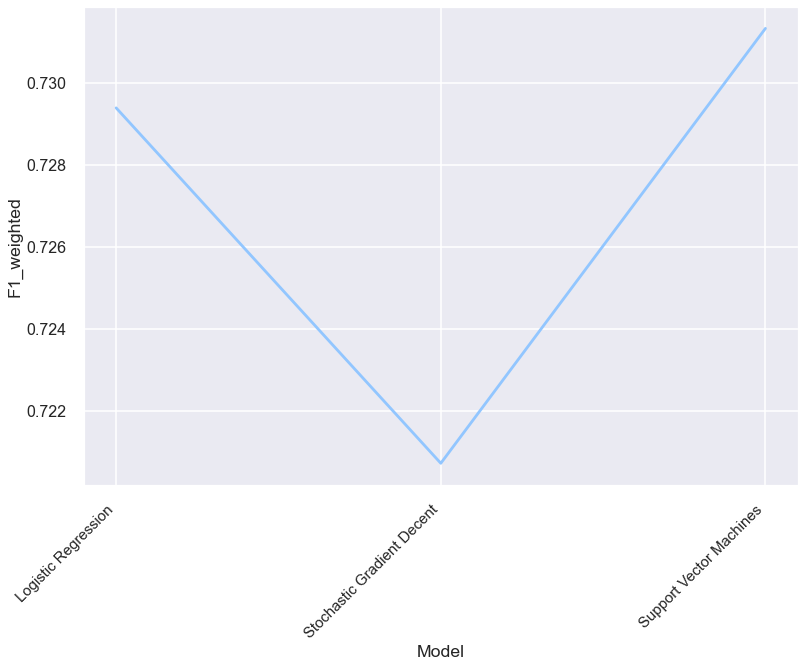

In [72]:
#Line plot for our F1 score models
sns.lineplot("Model", "F1_weighted", data=models)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small' )
plt.show()

* Our Line Graph it is at its highest point at Support Vector Machines Model. 
* So Our Best Model is Support Vector Machines. 
* So We will choose it to predict the Sentiment of the Test data set.

# CONCLUSION

More than half of the tweets examined support the beilief of man-made climate change. Futhermore, climate change is now one of the two most important issues in politics for Democrats. The data also suggests that the majority of anti climate change tweets come from Republicans and Trump supporters 


Last year Trump’s administration formally began the process to exit the climate deal, in which nearly 200 nations pledged to reduce greenhouse gas emissions and assist poor nations struggling with the consequences of a warming Earth. We noticed that the majority of tweets about climate change accross all classes involve the Paris agreement, COP22, Trump and Trump related hashtags/mentions. It was intresting to note that the most links are being shared in the pro climate change class and not in the news related class. 

Our final kaggle subission made use of a tuned linear SVC model and achived an F1 score of 0.731.

# Create A Submission File

* create submission dataframe
* save DataFrame to csv file for submission

In [73]:
X_test_data = test_df['message']#test dataset

test_pred = svc_clf_O.predict(X_test_data) #using Linear SVC

test_pred_int = test_pred.astype(np.int) #change data type to integer

test_df['sentiment'] = test_pred_int #store the predicted sentiment into the sentiment column

submission = test_df[['tweetid','sentiment']] #define my dataframe called submission with two columns of tweetid and sentiment
submission.to_csv('submission.csv', index=False) # writing data to a CSV file
submission

tweetid  sentiment
15819   169760          1
15820    35326          1
15821   224985          1
15822   476263          1
15823   872928          1
...        ...        ...
26360   895714          1
26361   875167          1
26362    78329          2
26363   867455          0
26364   470892          2

[10546 rows x 2 columns]

# Saving our Support Vector Machines model

In [75]:
import pickle

model_save_path = "Support_Vector_Machine_AM5_DSFT21.pkl"

with open(model_save_path,'wb') as file:
    pickle.dump(svc_clf_O,file)

# Saving our Logistics Regression model

In [76]:
import pickle

model_save_path = "Logistics_Regression_AM5_DSFT21.pkl"

with open(model_save_path,'wb') as file:
    pickle.dump(text_clf_O,file)